# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv("C:\\Users\\nsuguru\\Desktop\\PerformananceMetrics-master\\5_a.csv") 
data.shape

(10100, 2)

# **Confusion Matrix**

In [3]:

def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0
data['Y_Pred'] = data.apply(lambda row:label(row.proba),axis=1)

data = pd.read_csv("C:\\Users\\nsuguru\\Desktop\\PerformananceMetrics-master\\5_a.csv") 
data.shape

TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)

#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)
    

0 0 100 10000


In [10]:
Y_Unique=data['proba'].unique()
p=np.round(Y_Unique,3)
Y_Unique=np.unique(p)
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))

401


In [6]:
Y_Unique=data['proba'].unique()
Y_Sorted=sorted(Y_Unique, reverse=True)
len(Y_Sorted)
print(Y_Sorted[2])

0.89982484614942


# **Threshold**

In [14]:
from tqdm import tqdm
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
for j in tqdm(range(len(Y_Sorted))):
  j=j
  TP=0
  FP=0
  data['Y_Pred'] = data.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
  print(Y_Sorted[j])
  for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0 and data.iloc[i][2]==1:
        FP=FP+1
    elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
        TP=TP+1 
  #print(TP,FP)    
  TPR.append(TP/P)
  FPR.append(FP/N)
print(TPR)
print(FPR)





  0%|                                                                                          | 0/401 [00:00<?, ?it/s]

0.9






  0%|▏                                                                                 | 1/401 [00:03<23:41,  3.55s/it]

0.899






  0%|▍                                                                                 | 2/401 [00:07<23:25,  3.52s/it]

0.898






  1%|▌                                                                                 | 3/401 [00:10<23:31,  3.55s/it]

0.897






  1%|▊                                                                                 | 4/401 [00:14<23:09,  3.50s/it]

0.896






  1%|█                                                                                 | 5/401 [00:17<23:06,  3.50s/it]

0.895






  1%|█▏                                                                                | 6/401 [00:21<23:07,  3.51s/it]

0.894






  2%|█▍                                                                                | 7/401 [00:24<23:05,  3.52s/it]

0.893






  2%|█▋                                                                                | 8/401 [00:28<23:15,  3.55s/it]

0.892






  2%|█▊                                                                                | 9/401 [00:31<23:08,  3.54s/it]

0.891






  2%|██                                                                               | 10/401 [00:35<22:59,  3.53s/it]

0.89






  3%|██▏                                                                              | 11/401 [00:38<22:50,  3.51s/it]

0.889






  3%|██▍                                                                              | 12/401 [00:42<22:59,  3.55s/it]

0.888






  3%|██▋                                                                              | 13/401 [00:46<23:12,  3.59s/it]

0.887






  3%|██▊                                                                              | 14/401 [00:50<24:17,  3.77s/it]

0.886






  4%|███                                                                              | 15/401 [00:53<23:34,  3.67s/it]

0.885






  4%|███▏                                                                             | 16/401 [00:57<23:03,  3.59s/it]

0.884






  4%|███▍                                                                             | 17/401 [01:00<22:51,  3.57s/it]

0.883






  4%|███▋                                                                             | 18/401 [01:04<22:54,  3.59s/it]

0.882






  5%|███▊                                                                             | 19/401 [01:07<22:56,  3.60s/it]

0.881






  5%|████                                                                             | 20/401 [01:11<22:39,  3.57s/it]

0.88






  5%|████▏                                                                            | 21/401 [01:14<22:26,  3.54s/it]

0.879






  5%|████▍                                                                            | 22/401 [01:18<22:19,  3.53s/it]

0.878






  6%|████▋                                                                            | 23/401 [01:21<22:20,  3.55s/it]

0.877






  6%|████▊                                                                            | 24/401 [01:25<22:14,  3.54s/it]

0.876






  6%|█████                                                                            | 25/401 [01:28<21:59,  3.51s/it]

0.875






  6%|█████▎                                                                           | 26/401 [01:32<22:01,  3.52s/it]

0.874






  7%|█████▍                                                                           | 27/401 [01:35<21:54,  3.52s/it]

0.873






  7%|█████▋                                                                           | 28/401 [01:39<21:45,  3.50s/it]

0.872






  7%|█████▊                                                                           | 29/401 [01:42<21:34,  3.48s/it]

0.871






  7%|██████                                                                           | 30/401 [01:46<21:35,  3.49s/it]

0.87






  8%|██████▎                                                                          | 31/401 [01:49<21:34,  3.50s/it]

0.869






  8%|██████▍                                                                          | 32/401 [01:53<21:41,  3.53s/it]

0.868






  8%|██████▋                                                                          | 33/401 [01:56<21:30,  3.51s/it]

0.867






  8%|██████▊                                                                          | 34/401 [02:00<21:29,  3.51s/it]

0.866






  9%|███████                                                                          | 35/401 [02:03<21:31,  3.53s/it]

0.865






  9%|███████▎                                                                         | 36/401 [02:07<21:25,  3.52s/it]

0.864






  9%|███████▍                                                                         | 37/401 [02:10<21:16,  3.51s/it]

0.863






  9%|███████▋                                                                         | 38/401 [02:14<21:09,  3.50s/it]

0.862






 10%|███████▉                                                                         | 39/401 [02:18<21:17,  3.53s/it]

0.861






 10%|████████                                                                         | 40/401 [02:21<21:08,  3.51s/it]

0.86






 10%|████████▎                                                                        | 41/401 [02:25<21:14,  3.54s/it]

0.859






 10%|████████▍                                                                        | 42/401 [02:28<21:20,  3.57s/it]

0.858






 11%|████████▋                                                                        | 43/401 [02:32<21:14,  3.56s/it]

0.857






 11%|████████▉                                                                        | 44/401 [02:35<21:14,  3.57s/it]

0.856






 11%|█████████                                                                        | 45/401 [02:39<21:07,  3.56s/it]

0.855






 11%|█████████▎                                                                       | 46/401 [02:42<21:02,  3.56s/it]

0.854






 12%|█████████▍                                                                       | 47/401 [02:46<20:45,  3.52s/it]

0.853






 12%|█████████▋                                                                       | 48/401 [02:49<20:32,  3.49s/it]

0.852






 12%|█████████▉                                                                       | 49/401 [02:53<20:43,  3.53s/it]

0.851






 12%|██████████                                                                       | 50/401 [02:56<20:39,  3.53s/it]

0.85






 13%|██████████▎                                                                      | 51/401 [03:00<20:46,  3.56s/it]

0.849






 13%|██████████▌                                                                      | 52/401 [03:04<20:45,  3.57s/it]

0.848






 13%|██████████▋                                                                      | 53/401 [03:07<20:48,  3.59s/it]

0.847






 13%|██████████▉                                                                      | 54/401 [03:11<20:43,  3.58s/it]

0.846






 14%|███████████                                                                      | 55/401 [03:14<20:37,  3.58s/it]

0.845






 14%|███████████▎                                                                     | 56/401 [03:18<20:32,  3.57s/it]

0.844






 14%|███████████▌                                                                     | 57/401 [03:22<20:30,  3.58s/it]

0.843






 14%|███████████▋                                                                     | 58/401 [03:25<20:29,  3.58s/it]

0.842






 15%|███████████▉                                                                     | 59/401 [03:29<20:14,  3.55s/it]

0.841






 15%|████████████                                                                     | 60/401 [03:32<20:06,  3.54s/it]

0.84






 15%|████████████▎                                                                    | 61/401 [03:36<20:00,  3.53s/it]

0.839






 15%|████████████▌                                                                    | 62/401 [03:39<19:51,  3.51s/it]

0.838






 16%|████████████▋                                                                    | 63/401 [03:43<19:41,  3.50s/it]

0.837






 16%|████████████▉                                                                    | 64/401 [03:46<19:36,  3.49s/it]

0.836






 16%|█████████████▏                                                                   | 65/401 [03:50<19:23,  3.46s/it]

0.835






 16%|█████████████▎                                                                   | 66/401 [03:53<19:13,  3.44s/it]

0.834






 17%|█████████████▌                                                                   | 67/401 [03:56<19:08,  3.44s/it]

0.833






 17%|█████████████▋                                                                   | 68/401 [04:00<19:10,  3.45s/it]

0.832






 17%|█████████████▉                                                                   | 69/401 [04:03<19:20,  3.49s/it]

0.831






 17%|██████████████▏                                                                  | 70/401 [04:07<19:28,  3.53s/it]

0.83






 18%|██████████████▎                                                                  | 71/401 [04:11<19:30,  3.55s/it]

0.829






 18%|██████████████▌                                                                  | 72/401 [04:14<19:15,  3.51s/it]

0.828






 18%|██████████████▋                                                                  | 73/401 [04:18<19:13,  3.52s/it]

0.827






 18%|██████████████▉                                                                  | 74/401 [04:21<18:59,  3.48s/it]

0.826






 19%|███████████████▏                                                                 | 75/401 [04:25<18:58,  3.49s/it]

0.825






 19%|███████████████▎                                                                 | 76/401 [04:28<18:48,  3.47s/it]

0.824






 19%|███████████████▌                                                                 | 77/401 [04:31<18:40,  3.46s/it]

0.823






 19%|███████████████▊                                                                 | 78/401 [04:35<18:41,  3.47s/it]

0.822






 20%|███████████████▉                                                                 | 79/401 [04:38<18:34,  3.46s/it]

0.821






 20%|████████████████▏                                                                | 80/401 [04:42<18:30,  3.46s/it]

0.82






 20%|████████████████▎                                                                | 81/401 [04:45<18:23,  3.45s/it]

0.819






 20%|████████████████▌                                                                | 82/401 [04:49<18:21,  3.45s/it]

0.818






 21%|████████████████▊                                                                | 83/401 [04:52<18:23,  3.47s/it]

0.817






 21%|████████████████▉                                                                | 84/401 [04:56<18:31,  3.51s/it]

0.816






 21%|█████████████████▏                                                               | 85/401 [04:59<18:21,  3.49s/it]

0.815






 21%|█████████████████▎                                                               | 86/401 [05:03<18:17,  3.48s/it]

0.814






 22%|█████████████████▌                                                               | 87/401 [05:06<18:40,  3.57s/it]

0.813






 22%|█████████████████▊                                                               | 88/401 [05:10<18:38,  3.57s/it]

0.812






 22%|█████████████████▉                                                               | 89/401 [05:14<18:29,  3.56s/it]

0.811






 22%|██████████████████▏                                                              | 90/401 [05:17<18:22,  3.55s/it]

0.81






 23%|██████████████████▍                                                              | 91/401 [05:21<18:19,  3.55s/it]

0.809






 23%|██████████████████▌                                                              | 92/401 [05:24<18:26,  3.58s/it]

0.808






 23%|██████████████████▊                                                              | 93/401 [05:28<18:20,  3.57s/it]

0.807






 23%|██████████████████▉                                                              | 94/401 [05:31<18:12,  3.56s/it]

0.806






 24%|███████████████████▏                                                             | 95/401 [05:35<18:04,  3.54s/it]

0.805






 24%|███████████████████▍                                                             | 96/401 [05:38<17:53,  3.52s/it]

0.804






 24%|███████████████████▌                                                             | 97/401 [05:42<17:54,  3.54s/it]

0.803






 24%|███████████████████▊                                                             | 98/401 [05:45<17:48,  3.52s/it]

0.802






 25%|███████████████████▉                                                             | 99/401 [05:49<17:41,  3.52s/it]

0.801






 25%|███████████████████▉                                                            | 100/401 [05:52<17:41,  3.53s/it]

0.8






 25%|████████████████████▏                                                           | 101/401 [05:56<17:35,  3.52s/it]

0.799






 25%|████████████████████▎                                                           | 102/401 [05:59<17:33,  3.52s/it]

0.798






 26%|████████████████████▌                                                           | 103/401 [06:03<17:31,  3.53s/it]

0.797






 26%|████████████████████▋                                                           | 104/401 [06:07<17:27,  3.53s/it]

0.796






 26%|████████████████████▉                                                           | 105/401 [06:10<17:32,  3.56s/it]

0.795






 26%|█████████████████████▏                                                          | 106/401 [06:14<17:28,  3.56s/it]

0.794






 27%|█████████████████████▎                                                          | 107/401 [06:17<17:33,  3.58s/it]

0.793






 27%|█████████████████████▌                                                          | 108/401 [06:21<17:28,  3.58s/it]

0.792






 27%|█████████████████████▋                                                          | 109/401 [06:25<17:28,  3.59s/it]

0.791






 27%|█████████████████████▉                                                          | 110/401 [06:28<17:10,  3.54s/it]

0.79






 28%|██████████████████████▏                                                         | 111/401 [06:31<16:55,  3.50s/it]

0.789






 28%|██████████████████████▎                                                         | 112/401 [06:36<17:46,  3.69s/it]

0.788






 28%|██████████████████████▌                                                         | 113/401 [06:40<18:38,  3.88s/it]

0.787






 28%|██████████████████████▋                                                         | 114/401 [06:44<19:30,  4.08s/it]

0.786






 29%|██████████████████████▉                                                         | 115/401 [06:48<19:29,  4.09s/it]

0.785






 29%|███████████████████████▏                                                        | 116/401 [06:52<19:11,  4.04s/it]

0.784






 29%|███████████████████████▎                                                        | 117/401 [06:56<18:48,  3.97s/it]

0.783






 29%|███████████████████████▌                                                        | 118/401 [07:00<18:32,  3.93s/it]

0.782






 30%|███████████████████████▋                                                        | 119/401 [07:04<18:16,  3.89s/it]

0.781






 30%|███████████████████████▉                                                        | 120/401 [07:08<18:04,  3.86s/it]

0.78






 30%|████████████████████████▏                                                       | 121/401 [07:11<17:55,  3.84s/it]

0.779






 30%|████████████████████████▎                                                       | 122/401 [07:15<17:53,  3.85s/it]

0.778






 31%|████████████████████████▌                                                       | 123/401 [07:19<17:46,  3.84s/it]

0.777






 31%|████████████████████████▋                                                       | 124/401 [07:23<17:40,  3.83s/it]

0.776






 31%|████████████████████████▉                                                       | 125/401 [07:27<17:48,  3.87s/it]

0.775






 31%|█████████████████████████▏                                                      | 126/401 [07:31<18:07,  3.96s/it]

0.774






 32%|█████████████████████████▎                                                      | 127/401 [07:36<19:03,  4.17s/it]

0.773






 32%|█████████████████████████▌                                                      | 128/401 [07:40<18:28,  4.06s/it]

0.772






 32%|█████████████████████████▋                                                      | 129/401 [07:44<18:24,  4.06s/it]

0.771






 32%|█████████████████████████▉                                                      | 130/401 [07:48<18:21,  4.06s/it]

0.77






 33%|██████████████████████████▏                                                     | 131/401 [07:51<17:47,  3.95s/it]

0.769






 33%|██████████████████████████▎                                                     | 132/401 [07:55<17:58,  4.01s/it]

0.768






 33%|██████████████████████████▌                                                     | 133/401 [07:59<17:38,  3.95s/it]

0.767






 33%|██████████████████████████▋                                                     | 134/401 [08:03<17:34,  3.95s/it]

0.766






 34%|██████████████████████████▉                                                     | 135/401 [08:07<17:22,  3.92s/it]

0.765






 34%|███████████████████████████▏                                                    | 136/401 [08:11<17:16,  3.91s/it]

0.764






 34%|███████████████████████████▎                                                    | 137/401 [08:15<16:53,  3.84s/it]

0.763






 34%|███████████████████████████▌                                                    | 138/401 [08:18<16:37,  3.79s/it]

0.762






 35%|███████████████████████████▋                                                    | 139/401 [08:22<16:44,  3.84s/it]

0.761






 35%|███████████████████████████▉                                                    | 140/401 [08:26<16:26,  3.78s/it]

0.76






 35%|████████████████████████████▏                                                   | 141/401 [08:30<16:12,  3.74s/it]

0.759






 35%|████████████████████████████▎                                                   | 142/401 [08:33<16:01,  3.71s/it]

0.758






 36%|████████████████████████████▌                                                   | 143/401 [08:37<15:49,  3.68s/it]

0.757






 36%|████████████████████████████▋                                                   | 144/401 [08:40<15:37,  3.65s/it]

0.756






 36%|████████████████████████████▉                                                   | 145/401 [08:44<15:30,  3.64s/it]

0.755






 36%|█████████████████████████████▏                                                  | 146/401 [08:48<15:26,  3.63s/it]

0.754






 37%|█████████████████████████████▎                                                  | 147/401 [08:51<15:20,  3.63s/it]

0.753






 37%|█████████████████████████████▌                                                  | 148/401 [08:56<16:07,  3.82s/it]

0.752






 37%|█████████████████████████████▋                                                  | 149/401 [08:59<16:06,  3.84s/it]

0.751






 37%|█████████████████████████████▉                                                  | 150/401 [09:03<15:57,  3.82s/it]

0.75






 38%|██████████████████████████████                                                  | 151/401 [09:07<15:51,  3.81s/it]

0.749






 38%|██████████████████████████████▎                                                 | 152/401 [09:11<15:46,  3.80s/it]

0.748






 38%|██████████████████████████████▌                                                 | 153/401 [09:15<15:41,  3.80s/it]

0.747






 38%|██████████████████████████████▋                                                 | 154/401 [09:19<16:08,  3.92s/it]

0.746






 39%|██████████████████████████████▉                                                 | 155/401 [09:23<16:30,  4.03s/it]

0.745






 39%|███████████████████████████████                                                 | 156/401 [09:28<17:54,  4.39s/it]

0.744






 39%|███████████████████████████████▎                                                | 157/401 [09:33<17:59,  4.43s/it]

0.743






 39%|███████████████████████████████▌                                                | 158/401 [09:37<17:34,  4.34s/it]

0.742






 40%|███████████████████████████████▋                                                | 159/401 [09:41<17:12,  4.27s/it]

0.741






 40%|███████████████████████████████▉                                                | 160/401 [09:45<16:38,  4.14s/it]

0.74






 40%|████████████████████████████████                                                | 161/401 [09:49<16:52,  4.22s/it]

0.739






 40%|████████████████████████████████▎                                               | 162/401 [09:53<16:40,  4.18s/it]

0.738






 41%|████████████████████████████████▌                                               | 163/401 [09:58<16:34,  4.18s/it]

0.737






 41%|████████████████████████████████▋                                               | 164/401 [10:02<16:31,  4.18s/it]

0.736






 41%|████████████████████████████████▉                                               | 165/401 [10:06<16:07,  4.10s/it]

0.735






 41%|█████████████████████████████████                                               | 166/401 [10:09<15:44,  4.02s/it]

0.734






 42%|█████████████████████████████████▎                                              | 167/401 [10:14<15:51,  4.06s/it]

0.733






 42%|█████████████████████████████████▌                                              | 168/401 [10:18<16:11,  4.17s/it]

0.732






 42%|█████████████████████████████████▋                                              | 169/401 [10:22<16:08,  4.18s/it]

0.731






 42%|█████████████████████████████████▉                                              | 170/401 [10:26<15:43,  4.09s/it]

0.73






 43%|██████████████████████████████████                                              | 171/401 [10:30<15:31,  4.05s/it]

0.729






 43%|██████████████████████████████████▎                                             | 172/401 [10:34<14:59,  3.93s/it]

0.728






 43%|██████████████████████████████████▌                                             | 173/401 [10:37<14:37,  3.85s/it]

0.727






 43%|██████████████████████████████████▋                                             | 174/401 [10:41<14:21,  3.80s/it]

0.726






 44%|██████████████████████████████████▉                                             | 175/401 [10:45<14:19,  3.81s/it]

0.725






 44%|███████████████████████████████████                                             | 176/401 [10:49<14:09,  3.78s/it]

0.724






 44%|███████████████████████████████████▎                                            | 177/401 [10:52<14:03,  3.77s/it]

0.723






 44%|███████████████████████████████████▌                                            | 178/401 [10:56<14:02,  3.78s/it]

0.722






 45%|███████████████████████████████████▋                                            | 179/401 [11:00<13:58,  3.78s/it]

0.721






 45%|███████████████████████████████████▉                                            | 180/401 [11:04<14:09,  3.84s/it]

0.72






 45%|████████████████████████████████████                                            | 181/401 [11:08<14:25,  3.93s/it]

0.719






 45%|████████████████████████████████████▎                                           | 182/401 [11:12<14:27,  3.96s/it]

0.718






 46%|████████████████████████████████████▌                                           | 183/401 [11:16<14:13,  3.92s/it]

0.717






 46%|████████████████████████████████████▋                                           | 184/401 [11:20<14:03,  3.89s/it]

0.716






 46%|████████████████████████████████████▉                                           | 185/401 [11:24<13:55,  3.87s/it]

0.715






 46%|█████████████████████████████████████                                           | 186/401 [11:27<13:47,  3.85s/it]

0.714






 47%|█████████████████████████████████████▎                                          | 187/401 [11:32<14:21,  4.03s/it]

0.713






 47%|█████████████████████████████████████▌                                          | 188/401 [11:36<14:08,  3.98s/it]

0.712






 47%|█████████████████████████████████████▋                                          | 189/401 [11:39<13:53,  3.93s/it]

0.711






 47%|█████████████████████████████████████▉                                          | 190/401 [11:43<13:42,  3.90s/it]

0.71






 48%|██████████████████████████████████████                                          | 191/401 [11:47<13:39,  3.90s/it]

0.709






 48%|██████████████████████████████████████▎                                         | 192/401 [11:51<13:35,  3.90s/it]

0.708






 48%|██████████████████████████████████████▌                                         | 193/401 [11:55<13:25,  3.87s/it]

0.707






 48%|██████████████████████████████████████▋                                         | 194/401 [11:59<13:17,  3.85s/it]

0.706






 49%|██████████████████████████████████████▉                                         | 195/401 [12:03<13:13,  3.85s/it]

0.705






 49%|███████████████████████████████████████                                         | 196/401 [12:06<13:06,  3.84s/it]

0.704






 49%|███████████████████████████████████████▎                                        | 197/401 [12:10<13:08,  3.87s/it]

0.703






 49%|███████████████████████████████████████▌                                        | 198/401 [12:14<13:14,  3.91s/it]

0.702






 50%|███████████████████████████████████████▋                                        | 199/401 [12:18<13:25,  3.99s/it]

0.701






 50%|███████████████████████████████████████▉                                        | 200/401 [12:22<13:11,  3.94s/it]

0.7






 50%|████████████████████████████████████████                                        | 201/401 [12:26<13:02,  3.91s/it]

0.699






 50%|████████████████████████████████████████▎                                       | 202/401 [12:30<12:51,  3.88s/it]

0.698






 51%|████████████████████████████████████████▍                                       | 203/401 [12:34<12:43,  3.86s/it]

0.697






 51%|████████████████████████████████████████▋                                       | 204/401 [12:38<12:37,  3.85s/it]

0.696






 51%|████████████████████████████████████████▉                                       | 205/401 [12:41<12:31,  3.84s/it]

0.695






 51%|█████████████████████████████████████████                                       | 206/401 [12:45<12:27,  3.83s/it]

0.694






 52%|█████████████████████████████████████████▎                                      | 207/401 [12:49<12:23,  3.83s/it]

0.693






 52%|█████████████████████████████████████████▍                                      | 208/401 [12:53<12:20,  3.84s/it]

0.692






 52%|█████████████████████████████████████████▋                                      | 209/401 [12:57<12:25,  3.88s/it]

0.691






 52%|█████████████████████████████████████████▉                                      | 210/401 [13:01<12:18,  3.87s/it]

0.69






 53%|██████████████████████████████████████████                                      | 211/401 [13:05<12:38,  3.99s/it]

0.689






 53%|██████████████████████████████████████████▎                                     | 212/401 [13:09<12:51,  4.08s/it]

0.688






 53%|██████████████████████████████████████████▍                                     | 213/401 [13:14<13:13,  4.22s/it]

0.687






 53%|██████████████████████████████████████████▋                                     | 214/401 [13:18<13:04,  4.20s/it]

0.686






 54%|██████████████████████████████████████████▉                                     | 215/401 [13:22<13:03,  4.21s/it]

0.685






 54%|███████████████████████████████████████████                                     | 216/401 [13:26<12:36,  4.09s/it]

0.684






 54%|███████████████████████████████████████████▎                                    | 217/401 [13:31<13:02,  4.25s/it]

0.683






 54%|███████████████████████████████████████████▍                                    | 218/401 [13:35<12:52,  4.22s/it]

0.682






 55%|███████████████████████████████████████████▋                                    | 219/401 [13:39<12:27,  4.11s/it]

0.681






 55%|███████████████████████████████████████████▉                                    | 220/401 [13:42<12:07,  4.02s/it]

0.68






 55%|████████████████████████████████████████████                                    | 221/401 [13:46<11:49,  3.94s/it]

0.679






 55%|████████████████████████████████████████████▎                                   | 222/401 [13:50<11:38,  3.90s/it]

0.678






 56%|████████████████████████████████████████████▍                                   | 223/401 [13:54<11:28,  3.87s/it]

0.677






 56%|████████████████████████████████████████████▋                                   | 224/401 [13:58<11:22,  3.86s/it]

0.676






 56%|████████████████████████████████████████████▉                                   | 225/401 [14:02<11:20,  3.87s/it]

0.675






 56%|█████████████████████████████████████████████                                   | 226/401 [14:05<11:18,  3.88s/it]

0.674






 57%|█████████████████████████████████████████████▎                                  | 227/401 [14:09<11:11,  3.86s/it]

0.673






 57%|█████████████████████████████████████████████▍                                  | 228/401 [14:13<11:06,  3.85s/it]

0.672






 57%|█████████████████████████████████████████████▋                                  | 229/401 [14:17<11:06,  3.88s/it]

0.671






 57%|█████████████████████████████████████████████▉                                  | 230/401 [14:21<10:56,  3.84s/it]

0.67






 58%|██████████████████████████████████████████████                                  | 231/401 [14:25<10:48,  3.81s/it]

0.669






 58%|██████████████████████████████████████████████▎                                 | 232/401 [14:28<10:42,  3.80s/it]

0.668






 58%|██████████████████████████████████████████████▍                                 | 233/401 [14:32<10:37,  3.80s/it]

0.667






 58%|██████████████████████████████████████████████▋                                 | 234/401 [14:36<10:33,  3.79s/it]

0.666






 59%|██████████████████████████████████████████████▉                                 | 235/401 [14:40<10:31,  3.80s/it]

0.665






 59%|███████████████████████████████████████████████                                 | 236/401 [14:43<10:23,  3.78s/it]

0.664






 59%|███████████████████████████████████████████████▎                                | 237/401 [14:48<10:54,  3.99s/it]

0.663






 59%|███████████████████████████████████████████████▍                                | 238/401 [14:52<11:05,  4.08s/it]

0.662






 60%|███████████████████████████████████████████████▋                                | 239/401 [14:56<10:55,  4.04s/it]

0.661






 60%|███████████████████████████████████████████████▉                                | 240/401 [15:00<10:46,  4.02s/it]

0.66






 60%|████████████████████████████████████████████████                                | 241/401 [15:04<10:50,  4.07s/it]

0.659






 60%|████████████████████████████████████████████████▎                               | 242/401 [15:09<11:11,  4.22s/it]

0.658






 61%|████████████████████████████████████████████████▍                               | 243/401 [15:13<10:58,  4.17s/it]

0.657






 61%|████████████████████████████████████████████████▋                               | 244/401 [15:17<10:38,  4.07s/it]

0.656






 61%|████████████████████████████████████████████████▉                               | 245/401 [15:21<10:22,  3.99s/it]

0.655






 61%|█████████████████████████████████████████████████                               | 246/401 [15:24<10:08,  3.93s/it]

0.654






 62%|█████████████████████████████████████████████████▎                              | 247/401 [15:28<09:56,  3.88s/it]

0.653






 62%|█████████████████████████████████████████████████▍                              | 248/401 [15:32<09:48,  3.85s/it]

0.652






 62%|█████████████████████████████████████████████████▋                              | 249/401 [15:36<09:44,  3.85s/it]

0.651






 62%|█████████████████████████████████████████████████▉                              | 250/401 [15:40<09:49,  3.90s/it]

0.65






 63%|██████████████████████████████████████████████████                              | 251/401 [15:44<09:40,  3.87s/it]

0.649






 63%|██████████████████████████████████████████████████▎                             | 252/401 [15:48<09:41,  3.90s/it]

0.648






 63%|██████████████████████████████████████████████████▍                             | 253/401 [15:51<09:35,  3.89s/it]

0.647






 63%|██████████████████████████████████████████████████▋                             | 254/401 [15:56<09:41,  3.96s/it]

0.646






 64%|██████████████████████████████████████████████████▊                             | 255/401 [16:00<10:03,  4.13s/it]

0.645






 64%|███████████████████████████████████████████████████                             | 256/401 [16:04<09:45,  4.04s/it]

0.644






 64%|███████████████████████████████████████████████████▎                            | 257/401 [16:08<09:29,  3.95s/it]

0.643






 64%|███████████████████████████████████████████████████▍                            | 258/401 [16:11<09:16,  3.89s/it]

0.642






 65%|███████████████████████████████████████████████████▋                            | 259/401 [16:15<09:07,  3.86s/it]

0.641






 65%|███████████████████████████████████████████████████▊                            | 260/401 [16:19<09:12,  3.92s/it]

0.64






 65%|████████████████████████████████████████████████████                            | 261/401 [16:23<09:02,  3.88s/it]

0.639






 65%|████████████████████████████████████████████████████▎                           | 262/401 [16:27<08:57,  3.87s/it]

0.638






 66%|████████████████████████████████████████████████████▍                           | 263/401 [16:31<08:59,  3.91s/it]

0.637






 66%|████████████████████████████████████████████████████▋                           | 264/401 [16:35<09:01,  3.95s/it]

0.636






 66%|████████████████████████████████████████████████████▊                           | 265/401 [16:39<08:49,  3.90s/it]

0.635






 66%|█████████████████████████████████████████████████████                           | 266/401 [16:42<08:43,  3.88s/it]

0.634






 67%|█████████████████████████████████████████████████████▎                          | 267/401 [16:46<08:43,  3.91s/it]

0.633






 67%|█████████████████████████████████████████████████████▍                          | 268/401 [16:50<08:33,  3.86s/it]

0.632






 67%|█████████████████████████████████████████████████████▋                          | 269/401 [16:54<08:31,  3.87s/it]

0.631






 67%|█████████████████████████████████████████████████████▊                          | 270/401 [16:58<08:38,  3.96s/it]

0.63






 68%|██████████████████████████████████████████████████████                          | 271/401 [17:03<08:45,  4.04s/it]

0.629






 68%|██████████████████████████████████████████████████████▎                         | 272/401 [17:07<08:43,  4.06s/it]

0.628






 68%|██████████████████████████████████████████████████████▍                         | 273/401 [17:11<08:32,  4.01s/it]

0.627






 68%|██████████████████████████████████████████████████████▋                         | 274/401 [17:14<08:20,  3.94s/it]

0.626






 69%|██████████████████████████████████████████████████████▊                         | 275/401 [17:18<08:11,  3.90s/it]

0.625






 69%|███████████████████████████████████████████████████████                         | 276/401 [17:22<08:12,  3.94s/it]

0.624






 69%|███████████████████████████████████████████████████████▎                        | 277/401 [17:26<08:23,  4.06s/it]

0.623






 69%|███████████████████████████████████████████████████████▍                        | 278/401 [17:30<08:17,  4.04s/it]

0.622






 70%|███████████████████████████████████████████████████████▋                        | 279/401 [17:34<08:05,  3.98s/it]

0.621






 70%|███████████████████████████████████████████████████████▊                        | 280/401 [17:38<07:49,  3.88s/it]

0.62






 70%|████████████████████████████████████████████████████████                        | 281/401 [17:42<07:36,  3.80s/it]

0.619






 70%|████████████████████████████████████████████████████████▎                       | 282/401 [17:45<07:33,  3.81s/it]

0.618






 71%|████████████████████████████████████████████████████████▍                       | 283/401 [17:49<07:28,  3.80s/it]

0.617






 71%|████████████████████████████████████████████████████████▋                       | 284/401 [17:53<07:35,  3.89s/it]

0.616






 71%|████████████████████████████████████████████████████████▊                       | 285/401 [17:57<07:27,  3.86s/it]

0.615






 71%|█████████████████████████████████████████████████████████                       | 286/401 [18:01<07:18,  3.81s/it]

0.614






 72%|█████████████████████████████████████████████████████████▎                      | 287/401 [18:04<07:11,  3.79s/it]

0.613






 72%|█████████████████████████████████████████████████████████▍                      | 288/401 [18:08<07:04,  3.76s/it]

0.612






 72%|█████████████████████████████████████████████████████████▋                      | 289/401 [18:12<06:59,  3.74s/it]

0.611






 72%|█████████████████████████████████████████████████████████▊                      | 290/401 [18:16<06:54,  3.73s/it]

0.61






 73%|██████████████████████████████████████████████████████████                      | 291/401 [18:19<06:50,  3.73s/it]

0.609






 73%|██████████████████████████████████████████████████████████▎                     | 292/401 [18:23<06:46,  3.73s/it]

0.608






 73%|██████████████████████████████████████████████████████████▍                     | 293/401 [18:27<06:40,  3.71s/it]

0.607






 73%|██████████████████████████████████████████████████████████▋                     | 294/401 [18:30<06:37,  3.71s/it]

0.606






 74%|██████████████████████████████████████████████████████████▊                     | 295/401 [18:34<06:32,  3.70s/it]

0.605






 74%|███████████████████████████████████████████████████████████                     | 296/401 [18:38<06:28,  3.70s/it]

0.604






 74%|███████████████████████████████████████████████████████████▎                    | 297/401 [18:41<06:24,  3.70s/it]

0.603






 74%|███████████████████████████████████████████████████████████▍                    | 298/401 [18:45<06:20,  3.69s/it]

0.602






 75%|███████████████████████████████████████████████████████████▋                    | 299/401 [18:49<06:17,  3.70s/it]

0.601






 75%|███████████████████████████████████████████████████████████▊                    | 300/401 [18:53<06:14,  3.71s/it]

0.6






 75%|████████████████████████████████████████████████████████████                    | 301/401 [18:56<06:10,  3.71s/it]

0.599






 75%|████████████████████████████████████████████████████████████▏                   | 302/401 [19:00<06:07,  3.71s/it]

0.598






 76%|████████████████████████████████████████████████████████████▍                   | 303/401 [19:04<06:03,  3.71s/it]

0.597






 76%|████████████████████████████████████████████████████████████▋                   | 304/401 [19:08<06:01,  3.72s/it]

0.596






 76%|████████████████████████████████████████████████████████████▊                   | 305/401 [19:11<05:56,  3.71s/it]

0.595






 76%|█████████████████████████████████████████████████████████████                   | 306/401 [19:15<05:52,  3.71s/it]

0.594






 77%|█████████████████████████████████████████████████████████████▏                  | 307/401 [19:19<05:47,  3.70s/it]

0.593






 77%|█████████████████████████████████████████████████████████████▍                  | 308/401 [19:22<05:43,  3.70s/it]

0.592






 77%|█████████████████████████████████████████████████████████████▋                  | 309/401 [19:26<05:40,  3.70s/it]

0.591






 77%|█████████████████████████████████████████████████████████████▊                  | 310/401 [19:30<05:38,  3.72s/it]

0.59






 78%|██████████████████████████████████████████████████████████████                  | 311/401 [19:33<05:34,  3.72s/it]

0.589






 78%|██████████████████████████████████████████████████████████████▏                 | 312/401 [19:38<05:50,  3.94s/it]

0.588






 78%|██████████████████████████████████████████████████████████████▍                 | 313/401 [19:42<05:43,  3.90s/it]

0.587






 78%|██████████████████████████████████████████████████████████████▋                 | 314/401 [19:46<05:59,  4.14s/it]

0.586






 79%|██████████████████████████████████████████████████████████████▊                 | 315/401 [19:50<05:53,  4.11s/it]

0.585






 79%|███████████████████████████████████████████████████████████████                 | 316/401 [19:54<05:44,  4.05s/it]

0.584






 79%|███████████████████████████████████████████████████████████████▏                | 317/401 [19:58<05:30,  3.94s/it]

0.583






 79%|███████████████████████████████████████████████████████████████▍                | 318/401 [20:02<05:24,  3.90s/it]

0.582






 80%|███████████████████████████████████████████████████████████████▋                | 319/401 [20:06<05:15,  3.85s/it]

0.581






 80%|███████████████████████████████████████████████████████████████▊                | 320/401 [20:09<05:09,  3.82s/it]

0.58






 80%|████████████████████████████████████████████████████████████████                | 321/401 [20:13<05:03,  3.79s/it]

0.579






 80%|████████████████████████████████████████████████████████████████▏               | 322/401 [20:17<05:01,  3.81s/it]

0.578






 81%|████████████████████████████████████████████████████████████████▍               | 323/401 [20:21<04:57,  3.81s/it]

0.577






 81%|████████████████████████████████████████████████████████████████▋               | 324/401 [20:25<04:53,  3.81s/it]

0.576






 81%|████████████████████████████████████████████████████████████████▊               | 325/401 [20:28<04:48,  3.80s/it]

0.575






 81%|█████████████████████████████████████████████████████████████████               | 326/401 [20:32<04:45,  3.80s/it]

0.574






 82%|█████████████████████████████████████████████████████████████████▏              | 327/401 [20:36<04:40,  3.79s/it]

0.573






 82%|█████████████████████████████████████████████████████████████████▍              | 328/401 [20:40<04:36,  3.79s/it]

0.572






 82%|█████████████████████████████████████████████████████████████████▋              | 329/401 [20:43<04:32,  3.79s/it]

0.571






 82%|█████████████████████████████████████████████████████████████████▊              | 330/401 [20:47<04:29,  3.79s/it]

0.57






 83%|██████████████████████████████████████████████████████████████████              | 331/401 [20:51<04:23,  3.77s/it]

0.569






 83%|██████████████████████████████████████████████████████████████████▏             | 332/401 [20:55<04:22,  3.81s/it]

0.568






 83%|██████████████████████████████████████████████████████████████████▍             | 333/401 [20:59<04:16,  3.78s/it]

0.567






 83%|██████████████████████████████████████████████████████████████████▋             | 334/401 [21:02<04:11,  3.76s/it]

0.566






 84%|██████████████████████████████████████████████████████████████████▊             | 335/401 [21:06<04:06,  3.74s/it]

0.565






 84%|███████████████████████████████████████████████████████████████████             | 336/401 [21:10<04:04,  3.76s/it]

0.564






 84%|███████████████████████████████████████████████████████████████████▏            | 337/401 [21:13<03:57,  3.71s/it]

0.563






 84%|███████████████████████████████████████████████████████████████████▍            | 338/401 [21:17<03:59,  3.80s/it]

0.562






 85%|███████████████████████████████████████████████████████████████████▋            | 339/401 [21:21<03:46,  3.66s/it]

0.561






 85%|███████████████████████████████████████████████████████████████████▊            | 340/401 [21:24<03:37,  3.57s/it]

0.56






 85%|████████████████████████████████████████████████████████████████████            | 341/401 [21:27<03:30,  3.51s/it]

0.559






 85%|████████████████████████████████████████████████████████████████████▏           | 342/401 [21:31<03:24,  3.46s/it]

0.558






 86%|████████████████████████████████████████████████████████████████████▍           | 343/401 [21:34<03:19,  3.43s/it]

0.557






 86%|████████████████████████████████████████████████████████████████████▋           | 344/401 [21:38<03:14,  3.42s/it]

0.556






 86%|████████████████████████████████████████████████████████████████████▊           | 345/401 [21:41<03:10,  3.40s/it]

0.555






 86%|█████████████████████████████████████████████████████████████████████           | 346/401 [21:44<03:06,  3.40s/it]

0.554






 87%|█████████████████████████████████████████████████████████████████████▏          | 347/401 [21:48<03:02,  3.39s/it]

0.553






 87%|█████████████████████████████████████████████████████████████████████▍          | 348/401 [21:51<02:58,  3.37s/it]

0.552






 87%|█████████████████████████████████████████████████████████████████████▋          | 349/401 [21:54<02:56,  3.39s/it]

0.551






 87%|█████████████████████████████████████████████████████████████████████▊          | 350/401 [21:58<02:50,  3.35s/it]

0.55






 88%|██████████████████████████████████████████████████████████████████████          | 351/401 [22:01<02:46,  3.33s/it]

0.549






 88%|██████████████████████████████████████████████████████████████████████▏         | 352/401 [22:04<02:43,  3.33s/it]

0.548






 88%|██████████████████████████████████████████████████████████████████████▍         | 353/401 [22:08<02:40,  3.34s/it]

0.547






 88%|██████████████████████████████████████████████████████████████████████▌         | 354/401 [22:11<02:37,  3.35s/it]

0.546






 89%|██████████████████████████████████████████████████████████████████████▊         | 355/401 [22:14<02:34,  3.35s/it]

0.545






 89%|███████████████████████████████████████████████████████████████████████         | 356/401 [22:18<02:30,  3.34s/it]

0.544






 89%|███████████████████████████████████████████████████████████████████████▏        | 357/401 [22:21<02:27,  3.35s/it]

0.543






 89%|███████████████████████████████████████████████████████████████████████▍        | 358/401 [22:24<02:23,  3.34s/it]

0.542






 90%|███████████████████████████████████████████████████████████████████████▌        | 359/401 [22:28<02:20,  3.34s/it]

0.541






 90%|███████████████████████████████████████████████████████████████████████▊        | 360/401 [22:31<02:17,  3.35s/it]

0.54






 90%|████████████████████████████████████████████████████████████████████████        | 361/401 [22:34<02:13,  3.34s/it]

0.539






 90%|████████████████████████████████████████████████████████████████████████▏       | 362/401 [22:38<02:09,  3.32s/it]

0.538






 91%|████████████████████████████████████████████████████████████████████████▍       | 363/401 [22:41<02:06,  3.33s/it]

0.537






 91%|████████████████████████████████████████████████████████████████████████▌       | 364/401 [22:44<02:03,  3.33s/it]

0.536






 91%|████████████████████████████████████████████████████████████████████████▊       | 365/401 [22:48<02:00,  3.34s/it]

0.535






 91%|█████████████████████████████████████████████████████████████████████████       | 366/401 [22:51<01:56,  3.34s/it]

0.534






 92%|█████████████████████████████████████████████████████████████████████████▏      | 367/401 [22:54<01:53,  3.34s/it]

0.533






 92%|█████████████████████████████████████████████████████████████████████████▍      | 368/401 [22:58<01:50,  3.33s/it]

0.532






 92%|█████████████████████████████████████████████████████████████████████████▌      | 369/401 [23:01<01:46,  3.34s/it]

0.531






 92%|█████████████████████████████████████████████████████████████████████████▊      | 370/401 [23:04<01:42,  3.32s/it]

0.53






 93%|██████████████████████████████████████████████████████████████████████████      | 371/401 [23:08<01:39,  3.32s/it]

0.529






 93%|██████████████████████████████████████████████████████████████████████████▏     | 372/401 [23:11<01:36,  3.32s/it]

0.528






 93%|██████████████████████████████████████████████████████████████████████████▍     | 373/401 [23:14<01:32,  3.30s/it]

0.527






 93%|██████████████████████████████████████████████████████████████████████████▌     | 374/401 [23:18<01:29,  3.31s/it]

0.526






 94%|██████████████████████████████████████████████████████████████████████████▊     | 375/401 [23:21<01:29,  3.44s/it]

0.525






 94%|███████████████████████████████████████████████████████████████████████████     | 376/401 [23:26<01:32,  3.72s/it]

0.524






 94%|███████████████████████████████████████████████████████████████████████████▏    | 377/401 [23:30<01:32,  3.87s/it]

0.523






 94%|███████████████████████████████████████████████████████████████████████████▍    | 378/401 [23:34<01:30,  3.93s/it]

0.522






 95%|███████████████████████████████████████████████████████████████████████████▌    | 379/401 [23:40<01:40,  4.56s/it]

0.521






 95%|███████████████████████████████████████████████████████████████████████████▊    | 380/401 [23:45<01:35,  4.56s/it]

0.52






 95%|████████████████████████████████████████████████████████████████████████████    | 381/401 [23:49<01:29,  4.46s/it]

0.519






 95%|████████████████████████████████████████████████████████████████████████████▏   | 382/401 [23:53<01:22,  4.33s/it]

0.518






 96%|████████████████████████████████████████████████████████████████████████████▍   | 383/401 [23:57<01:16,  4.23s/it]

0.517






 96%|████████████████████████████████████████████████████████████████████████████▌   | 384/401 [24:01<01:09,  4.12s/it]

0.516






 96%|████████████████████████████████████████████████████████████████████████████▊   | 385/401 [24:05<01:06,  4.13s/it]

0.515






 96%|█████████████████████████████████████████████████████████████████████████████   | 386/401 [24:09<01:01,  4.09s/it]

0.514






 97%|█████████████████████████████████████████████████████████████████████████████▏  | 387/401 [24:13<00:56,  4.00s/it]

0.513






 97%|█████████████████████████████████████████████████████████████████████████████▍  | 388/401 [24:16<00:51,  3.95s/it]

0.512






 97%|█████████████████████████████████████████████████████████████████████████████▌  | 389/401 [24:20<00:46,  3.88s/it]

0.511






 97%|█████████████████████████████████████████████████████████████████████████████▊  | 390/401 [24:24<00:42,  3.84s/it]

0.51






 98%|██████████████████████████████████████████████████████████████████████████████  | 391/401 [24:28<00:38,  3.81s/it]

0.509






 98%|██████████████████████████████████████████████████████████████████████████████▏ | 392/401 [24:31<00:33,  3.77s/it]

0.508






 98%|██████████████████████████████████████████████████████████████████████████████▍ | 393/401 [24:35<00:30,  3.75s/it]

0.507






 98%|██████████████████████████████████████████████████████████████████████████████▌ | 394/401 [24:39<00:26,  3.74s/it]

0.506






 99%|██████████████████████████████████████████████████████████████████████████████▊ | 395/401 [24:43<00:22,  3.76s/it]

0.505






 99%|███████████████████████████████████████████████████████████████████████████████ | 396/401 [24:47<00:19,  3.90s/it]

0.504






 99%|███████████████████████████████████████████████████████████████████████████████▏| 397/401 [24:51<00:15,  3.89s/it]

0.503






 99%|███████████████████████████████████████████████████████████████████████████████▍| 398/401 [24:55<00:11,  3.89s/it]

0.502






100%|███████████████████████████████████████████████████████████████████████████████▌| 399/401 [24:58<00:07,  3.87s/it]

0.501






100%|███████████████████████████████████████████████████████████████████████████████▊| 400/401 [25:02<00:03,  3.92s/it]

0.5






100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [25:06<00:00,  3.93s/it]

[0.0, 0.0015, 0.004, 0.0068, 0.0097, 0.0117, 0.0137, 0.0162, 0.0188, 0.0204, 0.0233, 0.0259, 0.0291, 0.0318, 0.0339, 0.0359, 0.0382, 0.0409, 0.0431, 0.0456, 0.0475, 0.0497, 0.052, 0.0559, 0.058, 0.0603, 0.062, 0.0641, 0.066, 0.069, 0.0708, 0.0729, 0.075, 0.0776, 0.0801, 0.0825, 0.0849, 0.0882, 0.091, 0.0933, 0.0955, 0.0988, 0.1011, 0.1031, 0.1048, 0.1072, 0.1088, 0.1114, 0.1135, 0.1158, 0.1179, 0.1212, 0.1237, 0.1255, 0.1277, 0.1304, 0.1334, 0.1362, 0.1379, 0.1409, 0.1424, 0.1449, 0.1474, 0.1491, 0.1514, 0.1536, 0.1561, 0.1598, 0.1619, 0.1639, 0.1666, 0.1695, 0.1713, 0.1735, 0.1763, 0.1785, 0.1803, 0.1831, 0.1852, 0.1875, 0.1898, 0.192, 0.1948, 0.1964, 0.1981, 0.2004, 0.2024, 0.2037, 0.206, 0.2085, 0.211, 0.2139, 0.2161, 0.2178, 0.2204, 0.2222, 0.224, 0.226, 0.2282, 0.2319, 0.234, 0.2376, 0.2402, 0.2423, 0.2443, 0.2473, 0.2495, 0.2519, 0.2544, 0.2576, 0.2603, 0.2627, 0.2647, 0.2662, 0.2681, 0.2703, 0.2725, 0.2746, 0.2768, 0.279, 0.2812, 0.2836, 0.2859, 0.2891, 0.292, 0.2945, 0.298, 0.2

0.488309
Accuracy: 100.0


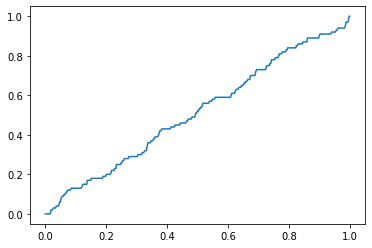

In [16]:
pAUC = np.trapz(TPR,FPR)
print(pAUC)
plt.plot(TPR,FPR)
Accuracy=((TP+TN)/(TP+TN+FP+FN))
print('Accuracy:',Accuracy)

9761 45 239 55
100
10000
0.55
0.1870748299319728
0.2791878172588833
446






  0%|                                                                                          | 0/446 [00:00<?, ?it/s]

0.595






  0%|▏                                                                                 | 1/446 [00:04<32:19,  4.36s/it]

0.592






  0%|▎                                                                                 | 2/446 [00:08<31:07,  4.21s/it]

0.59






  1%|▌                                                                                 | 3/446 [00:12<30:13,  4.09s/it]

0.589






  1%|▋                                                                                 | 4/446 [00:15<29:38,  4.02s/it]

0.585






  1%|▉                                                                                 | 5/446 [00:19<29:15,  3.98s/it]

0.583






  1%|█                                                                                 | 6/446 [00:23<28:52,  3.94s/it]

0.582






  2%|█▎                                                                                | 7/446 [00:27<28:34,  3.91s/it]

0.581






  2%|█▍                                                                                | 8/446 [00:31<28:24,  3.89s/it]

0.58






  2%|█▋                                                                                | 9/446 [00:35<28:19,  3.89s/it]

0.579






  2%|█▊                                                                               | 10/446 [00:39<28:16,  3.89s/it]

0.572






  2%|█▉                                                                               | 11/446 [00:42<28:08,  3.88s/it]

0.57






  3%|██▏                                                                              | 12/446 [00:46<27:57,  3.86s/it]

0.568






  3%|██▎                                                                              | 13/446 [00:50<27:47,  3.85s/it]

0.566






  3%|██▌                                                                              | 14/446 [00:54<27:40,  3.84s/it]

0.565






  3%|██▋                                                                              | 15/446 [00:58<27:44,  3.86s/it]

0.562






  4%|██▉                                                                              | 16/446 [01:02<27:43,  3.87s/it]

0.56






  4%|███                                                                              | 17/446 [01:06<27:31,  3.85s/it]

0.556






  4%|███▎                                                                             | 18/446 [01:09<27:37,  3.87s/it]

0.554






  4%|███▍                                                                             | 19/446 [01:14<28:32,  4.01s/it]

0.552






  4%|███▋                                                                             | 20/446 [01:17<27:34,  3.88s/it]

0.551






  5%|███▊                                                                             | 21/446 [01:21<26:38,  3.76s/it]

0.546






  5%|███▉                                                                             | 22/446 [01:24<26:07,  3.70s/it]

0.538






  5%|████▏                                                                            | 23/446 [01:28<25:45,  3.65s/it]

0.536






  5%|████▎                                                                            | 24/446 [01:32<25:33,  3.64s/it]

0.535






  6%|████▌                                                                            | 25/446 [01:35<25:21,  3.61s/it]

0.534






  6%|████▋                                                                            | 26/446 [01:39<25:22,  3.63s/it]

0.533






  6%|████▉                                                                            | 27/446 [01:43<25:44,  3.69s/it]

0.532






  6%|█████                                                                            | 28/446 [01:47<27:07,  3.89s/it]

0.53






  7%|█████▎                                                                           | 29/446 [01:51<27:28,  3.95s/it]

0.527






  7%|█████▍                                                                           | 30/446 [01:55<27:11,  3.92s/it]

0.526






  7%|█████▋                                                                           | 31/446 [01:59<26:57,  3.90s/it]

0.523






  7%|█████▊                                                                           | 32/446 [02:03<26:46,  3.88s/it]

0.522






  7%|█████▉                                                                           | 33/446 [02:07<27:24,  3.98s/it]

0.516






  8%|██████▏                                                                          | 34/446 [02:11<27:32,  4.01s/it]

0.512






  8%|██████▎                                                                          | 35/446 [02:15<27:18,  3.99s/it]

0.51






  8%|██████▌                                                                          | 36/446 [02:19<27:06,  3.97s/it]

0.509






  8%|██████▋                                                                          | 37/446 [02:23<26:48,  3.93s/it]

0.508






  9%|██████▉                                                                          | 38/446 [02:26<26:39,  3.92s/it]

0.507






  9%|███████                                                                          | 39/446 [02:30<26:33,  3.92s/it]

0.506






  9%|███████▎                                                                         | 40/446 [02:34<26:24,  3.90s/it]

0.505






  9%|███████▍                                                                         | 41/446 [02:38<26:24,  3.91s/it]

0.504






  9%|███████▋                                                                         | 42/446 [02:42<26:25,  3.93s/it]

0.503






 10%|███████▊                                                                         | 43/446 [02:46<26:29,  3.94s/it]

0.502






 10%|███████▉                                                                         | 44/446 [02:50<26:15,  3.92s/it]

0.501






 10%|████████▏                                                                        | 45/446 [02:54<26:10,  3.92s/it]

0.5






 10%|████████▎                                                                        | 46/446 [02:58<26:02,  3.91s/it]

0.499






 11%|████████▌                                                                        | 47/446 [03:02<25:55,  3.90s/it]

0.498






 11%|████████▋                                                                        | 48/446 [03:06<25:55,  3.91s/it]

0.497






 11%|████████▉                                                                        | 49/446 [03:09<25:41,  3.88s/it]

0.496






 11%|█████████                                                                        | 50/446 [03:13<25:37,  3.88s/it]

0.495






 11%|█████████▎                                                                       | 51/446 [03:17<25:26,  3.86s/it]

0.494






 12%|█████████▍                                                                       | 52/446 [03:21<25:18,  3.86s/it]

0.493






 12%|█████████▋                                                                       | 53/446 [03:25<25:11,  3.85s/it]

0.492






 12%|█████████▊                                                                       | 54/446 [03:29<25:10,  3.85s/it]

0.491






 12%|█████████▉                                                                       | 55/446 [03:32<25:00,  3.84s/it]

0.49






 13%|██████████▏                                                                      | 56/446 [03:36<24:54,  3.83s/it]

0.489






 13%|██████████▎                                                                      | 57/446 [03:40<24:47,  3.82s/it]

0.488






 13%|██████████▌                                                                      | 58/446 [03:44<24:32,  3.79s/it]

0.487






 13%|██████████▋                                                                      | 59/446 [03:48<24:41,  3.83s/it]

0.486






 13%|██████████▉                                                                      | 60/446 [03:52<24:39,  3.83s/it]

0.485






 14%|███████████                                                                      | 61/446 [03:55<24:28,  3.81s/it]

0.484






 14%|███████████▎                                                                     | 62/446 [03:59<24:47,  3.87s/it]

0.483






 14%|███████████▍                                                                     | 63/446 [04:03<25:13,  3.95s/it]

0.482






 14%|███████████▌                                                                     | 64/446 [04:07<25:08,  3.95s/it]

0.481






 15%|███████████▊                                                                     | 65/446 [04:11<24:56,  3.93s/it]

0.48






 15%|███████████▉                                                                     | 66/446 [04:15<24:28,  3.86s/it]

0.479






 15%|████████████▏                                                                    | 67/446 [04:19<24:12,  3.83s/it]

0.478






 15%|████████████▎                                                                    | 68/446 [04:23<24:03,  3.82s/it]

0.477






 15%|████████████▌                                                                    | 69/446 [04:26<23:52,  3.80s/it]

0.476






 16%|████████████▋                                                                    | 70/446 [04:30<23:46,  3.79s/it]

0.475






 16%|████████████▉                                                                    | 71/446 [04:34<23:39,  3.78s/it]

0.474






 16%|█████████████                                                                    | 72/446 [04:38<23:40,  3.80s/it]

0.473






 16%|█████████████▎                                                                   | 73/446 [04:41<23:32,  3.79s/it]

0.472






 17%|█████████████▍                                                                   | 74/446 [04:45<23:24,  3.77s/it]

0.471






 17%|█████████████▌                                                                   | 75/446 [04:49<23:23,  3.78s/it]

0.47






 17%|█████████████▊                                                                   | 76/446 [04:53<23:12,  3.76s/it]

0.469






 17%|█████████████▉                                                                   | 77/446 [04:56<23:11,  3.77s/it]

0.468






 17%|██████████████▏                                                                  | 78/446 [05:00<23:02,  3.76s/it]

0.467






 18%|██████████████▎                                                                  | 79/446 [05:04<22:59,  3.76s/it]

0.466






 18%|██████████████▌                                                                  | 80/446 [05:08<22:51,  3.75s/it]

0.465






 18%|██████████████▋                                                                  | 81/446 [05:11<22:45,  3.74s/it]

0.464






 18%|██████████████▉                                                                  | 82/446 [05:15<22:41,  3.74s/it]

0.463






 19%|███████████████                                                                  | 83/446 [05:19<22:38,  3.74s/it]

0.462






 19%|███████████████▎                                                                 | 84/446 [05:23<22:32,  3.74s/it]

0.461






 19%|███████████████▍                                                                 | 85/446 [05:26<22:26,  3.73s/it]

0.46






 19%|███████████████▌                                                                 | 86/446 [05:30<22:20,  3.72s/it]

0.459






 20%|███████████████▊                                                                 | 87/446 [05:34<22:20,  3.73s/it]

0.458






 20%|███████████████▉                                                                 | 88/446 [05:38<22:29,  3.77s/it]

0.457






 20%|████████████████▏                                                                | 89/446 [05:42<22:34,  3.80s/it]

0.456






 20%|████████████████▎                                                                | 90/446 [05:45<22:24,  3.78s/it]

0.455






 20%|████████████████▌                                                                | 91/446 [05:49<22:21,  3.78s/it]

0.454






 21%|████████████████▋                                                                | 92/446 [05:53<22:07,  3.75s/it]

0.453






 21%|████████████████▉                                                                | 93/446 [05:56<22:04,  3.75s/it]

0.452






 21%|█████████████████                                                                | 94/446 [06:00<21:53,  3.73s/it]

0.451






 21%|█████████████████▎                                                               | 95/446 [06:04<22:12,  3.80s/it]

0.45






 22%|█████████████████▍                                                               | 96/446 [06:08<22:00,  3.77s/it]

0.449






 22%|█████████████████▌                                                               | 97/446 [06:11<21:45,  3.74s/it]

0.448






 22%|█████████████████▊                                                               | 98/446 [06:15<21:33,  3.72s/it]

0.447






 22%|█████████████████▉                                                               | 99/446 [06:19<21:22,  3.70s/it]

0.446






 22%|█████████████████▉                                                              | 100/446 [06:22<21:17,  3.69s/it]

0.445






 23%|██████████████████                                                              | 101/446 [06:26<21:09,  3.68s/it]

0.444






 23%|██████████████████▎                                                             | 102/446 [06:30<21:18,  3.72s/it]

0.443






 23%|██████████████████▍                                                             | 103/446 [06:34<21:07,  3.70s/it]

0.442






 23%|██████████████████▋                                                             | 104/446 [06:37<20:58,  3.68s/it]

0.441






 24%|██████████████████▊                                                             | 105/446 [06:41<20:52,  3.67s/it]

0.44






 24%|███████████████████                                                             | 106/446 [06:45<20:47,  3.67s/it]

0.439






 24%|███████████████████▏                                                            | 107/446 [06:48<20:43,  3.67s/it]

0.438






 24%|███████████████████▎                                                            | 108/446 [06:52<20:31,  3.64s/it]

0.437






 24%|███████████████████▌                                                            | 109/446 [06:55<20:22,  3.63s/it]

0.436






 25%|███████████████████▋                                                            | 110/446 [06:59<20:21,  3.63s/it]

0.435






 25%|███████████████████▉                                                            | 111/446 [07:03<20:23,  3.65s/it]

0.434






 25%|████████████████████                                                            | 112/446 [07:06<20:24,  3.67s/it]

0.433






 25%|████████████████████▎                                                           | 113/446 [07:10<20:17,  3.65s/it]

0.432






 26%|████████████████████▍                                                           | 114/446 [07:14<20:16,  3.66s/it]

0.431






 26%|████████████████████▋                                                           | 115/446 [07:18<20:35,  3.73s/it]

0.43






 26%|████████████████████▊                                                           | 116/446 [07:21<19:54,  3.62s/it]

0.429






 26%|████████████████████▉                                                           | 117/446 [07:24<19:16,  3.51s/it]

0.428






 26%|█████████████████████▏                                                          | 118/446 [07:28<18:55,  3.46s/it]

0.427






 27%|█████████████████████▎                                                          | 119/446 [07:31<18:39,  3.42s/it]

0.426






 27%|█████████████████████▌                                                          | 120/446 [07:34<18:24,  3.39s/it]

0.425






 27%|█████████████████████▋                                                          | 121/446 [07:38<18:12,  3.36s/it]

0.424






 27%|█████████████████████▉                                                          | 122/446 [07:41<18:02,  3.34s/it]

0.423






 28%|██████████████████████                                                          | 123/446 [07:44<17:56,  3.33s/it]

0.422






 28%|██████████████████████▏                                                         | 124/446 [07:47<17:47,  3.32s/it]

0.421






 28%|██████████████████████▍                                                         | 125/446 [07:51<17:44,  3.32s/it]

0.42






 28%|██████████████████████▌                                                         | 126/446 [07:54<17:36,  3.30s/it]

0.419






 28%|██████████████████████▊                                                         | 127/446 [07:57<17:28,  3.29s/it]

0.418






 29%|██████████████████████▉                                                         | 128/446 [08:01<17:25,  3.29s/it]

0.417






 29%|███████████████████████▏                                                        | 129/446 [08:04<17:21,  3.28s/it]

0.416






 29%|███████████████████████▎                                                        | 130/446 [08:07<17:09,  3.26s/it]

0.415






 29%|███████████████████████▍                                                        | 131/446 [08:10<17:01,  3.24s/it]

0.414






 30%|███████████████████████▋                                                        | 132/446 [08:13<16:53,  3.23s/it]

0.413






 30%|███████████████████████▊                                                        | 133/446 [08:17<16:46,  3.22s/it]

0.412






 30%|████████████████████████                                                        | 134/446 [08:20<16:44,  3.22s/it]

0.411






 30%|████████████████████████▏                                                       | 135/446 [08:24<17:50,  3.44s/it]

0.41






 30%|████████████████████████▍                                                       | 136/446 [08:28<19:38,  3.80s/it]

0.409






 31%|████████████████████████▌                                                       | 137/446 [08:33<20:11,  3.92s/it]

0.408






 31%|████████████████████████▊                                                       | 138/446 [08:36<19:41,  3.84s/it]

0.407






 31%|████████████████████████▉                                                       | 139/446 [08:40<19:05,  3.73s/it]

0.406






 31%|█████████████████████████                                                       | 140/446 [08:43<18:49,  3.69s/it]

0.405






 32%|█████████████████████████▎                                                      | 141/446 [08:47<18:32,  3.65s/it]

0.404






 32%|█████████████████████████▍                                                      | 142/446 [08:50<18:16,  3.61s/it]

0.403






 32%|█████████████████████████▋                                                      | 143/446 [08:54<18:02,  3.57s/it]

0.402






 32%|█████████████████████████▊                                                      | 144/446 [08:57<17:45,  3.53s/it]

0.401






 33%|██████████████████████████                                                      | 145/446 [09:01<17:43,  3.53s/it]

0.4






 33%|██████████████████████████▏                                                     | 146/446 [09:04<17:35,  3.52s/it]

0.399






 33%|██████████████████████████▎                                                     | 147/446 [09:08<17:36,  3.53s/it]

0.398






 33%|██████████████████████████▌                                                     | 148/446 [09:11<17:31,  3.53s/it]

0.397






 33%|██████████████████████████▋                                                     | 149/446 [09:15<17:26,  3.52s/it]

0.396






 34%|██████████████████████████▉                                                     | 150/446 [09:18<17:21,  3.52s/it]

0.395






 34%|███████████████████████████                                                     | 151/446 [09:22<17:21,  3.53s/it]

0.394






 34%|███████████████████████████▎                                                    | 152/446 [09:25<17:11,  3.51s/it]

0.393






 34%|███████████████████████████▍                                                    | 153/446 [09:29<17:05,  3.50s/it]

0.392






 35%|███████████████████████████▌                                                    | 154/446 [09:32<17:01,  3.50s/it]

0.391






 35%|███████████████████████████▊                                                    | 155/446 [09:36<16:53,  3.48s/it]

0.39






 35%|███████████████████████████▉                                                    | 156/446 [09:39<16:50,  3.48s/it]

0.389






 35%|████████████████████████████▏                                                   | 157/446 [09:43<16:45,  3.48s/it]

0.388






 35%|████████████████████████████▎                                                   | 158/446 [09:46<16:42,  3.48s/it]

0.387






 36%|████████████████████████████▌                                                   | 159/446 [09:50<16:32,  3.46s/it]

0.386






 36%|████████████████████████████▋                                                   | 160/446 [09:53<16:33,  3.47s/it]

0.385






 36%|████████████████████████████▉                                                   | 161/446 [09:57<16:25,  3.46s/it]

0.384






 36%|█████████████████████████████                                                   | 162/446 [10:00<16:24,  3.46s/it]

0.383






 37%|█████████████████████████████▏                                                  | 163/446 [10:04<16:21,  3.47s/it]

0.382






 37%|█████████████████████████████▍                                                  | 164/446 [10:07<16:17,  3.47s/it]

0.381






 37%|█████████████████████████████▌                                                  | 165/446 [10:10<16:06,  3.44s/it]

0.38






 37%|█████████████████████████████▊                                                  | 166/446 [10:14<16:08,  3.46s/it]

0.379






 37%|█████████████████████████████▉                                                  | 167/446 [10:17<16:02,  3.45s/it]

0.378






 38%|██████████████████████████████▏                                                 | 168/446 [10:21<15:57,  3.45s/it]

0.377






 38%|██████████████████████████████▎                                                 | 169/446 [10:24<15:55,  3.45s/it]

0.376






 38%|██████████████████████████████▍                                                 | 170/446 [10:28<15:50,  3.45s/it]

0.375






 38%|██████████████████████████████▋                                                 | 171/446 [10:31<15:44,  3.43s/it]

0.374






 39%|██████████████████████████████▊                                                 | 172/446 [10:35<15:35,  3.41s/it]

0.373






 39%|███████████████████████████████                                                 | 173/446 [10:38<15:38,  3.44s/it]

0.372






 39%|███████████████████████████████▏                                                | 174/446 [10:41<15:30,  3.42s/it]

0.371






 39%|███████████████████████████████▍                                                | 175/446 [10:45<15:27,  3.42s/it]

0.37






 39%|███████████████████████████████▌                                                | 176/446 [10:48<15:22,  3.42s/it]

0.369






 40%|███████████████████████████████▋                                                | 177/446 [10:52<15:16,  3.41s/it]

0.368






 40%|███████████████████████████████▉                                                | 178/446 [10:55<15:15,  3.42s/it]

0.367






 40%|████████████████████████████████                                                | 179/446 [10:58<15:08,  3.40s/it]

0.366






 40%|████████████████████████████████▎                                               | 180/446 [11:02<15:09,  3.42s/it]

0.365






 41%|████████████████████████████████▍                                               | 181/446 [11:05<15:02,  3.41s/it]

0.364






 41%|████████████████████████████████▋                                               | 182/446 [11:09<14:54,  3.39s/it]

0.363






 41%|████████████████████████████████▊                                               | 183/446 [11:12<14:53,  3.40s/it]

0.362






 41%|█████████████████████████████████                                               | 184/446 [11:15<14:53,  3.41s/it]

0.361






 41%|█████████████████████████████████▏                                              | 185/446 [11:19<14:45,  3.39s/it]

0.36






 42%|█████████████████████████████████▎                                              | 186/446 [11:22<14:34,  3.36s/it]

0.359






 42%|█████████████████████████████████▌                                              | 187/446 [11:25<14:29,  3.36s/it]

0.358






 42%|█████████████████████████████████▋                                              | 188/446 [11:29<14:24,  3.35s/it]

0.357






 42%|█████████████████████████████████▉                                              | 189/446 [11:32<14:18,  3.34s/it]

0.356






 43%|██████████████████████████████████                                              | 190/446 [11:35<14:18,  3.35s/it]

0.355






 43%|██████████████████████████████████▎                                             | 191/446 [11:39<14:07,  3.32s/it]

0.354






 43%|██████████████████████████████████▍                                             | 192/446 [11:42<14:00,  3.31s/it]

0.353






 43%|██████████████████████████████████▌                                             | 193/446 [11:45<13:50,  3.28s/it]

0.352






 43%|██████████████████████████████████▊                                             | 194/446 [11:49<13:47,  3.29s/it]

0.351






 44%|██████████████████████████████████▉                                             | 195/446 [11:52<13:42,  3.28s/it]

0.35






 44%|███████████████████████████████████▏                                            | 196/446 [11:55<13:44,  3.30s/it]

0.349






 44%|███████████████████████████████████▎                                            | 197/446 [11:58<13:37,  3.29s/it]

0.348






 44%|███████████████████████████████████▌                                            | 198/446 [12:02<13:39,  3.30s/it]

0.347






 45%|███████████████████████████████████▋                                            | 199/446 [12:05<13:35,  3.30s/it]

0.346






 45%|███████████████████████████████████▊                                            | 200/446 [12:08<13:30,  3.30s/it]

0.345






 45%|████████████████████████████████████                                            | 201/446 [12:11<13:19,  3.26s/it]

0.344






 45%|████████████████████████████████████▏                                           | 202/446 [12:15<13:11,  3.24s/it]

0.343






 46%|████████████████████████████████████▍                                           | 203/446 [12:18<13:07,  3.24s/it]

0.342






 46%|████████████████████████████████████▌                                           | 204/446 [12:21<13:06,  3.25s/it]

0.341






 46%|████████████████████████████████████▊                                           | 205/446 [12:24<13:05,  3.26s/it]

0.34






 46%|████████████████████████████████████▉                                           | 206/446 [12:28<13:09,  3.29s/it]

0.339






 46%|█████████████████████████████████████▏                                          | 207/446 [12:31<13:08,  3.30s/it]

0.338






 47%|█████████████████████████████████████▎                                          | 208/446 [12:35<13:13,  3.34s/it]

0.337






 47%|█████████████████████████████████████▍                                          | 209/446 [12:38<13:08,  3.33s/it]

0.336






 47%|█████████████████████████████████████▋                                          | 210/446 [12:41<13:01,  3.31s/it]

0.335






 47%|█████████████████████████████████████▊                                          | 211/446 [12:44<12:56,  3.31s/it]

0.334






 48%|██████████████████████████████████████                                          | 212/446 [12:48<12:50,  3.29s/it]

0.333






 48%|██████████████████████████████████████▏                                         | 213/446 [12:51<12:50,  3.31s/it]

0.332






 48%|██████████████████████████████████████▍                                         | 214/446 [12:54<12:51,  3.33s/it]

0.331






 48%|██████████████████████████████████████▌                                         | 215/446 [12:58<12:47,  3.32s/it]

0.33






 48%|██████████████████████████████████████▋                                         | 216/446 [13:01<12:45,  3.33s/it]

0.329






 49%|██████████████████████████████████████▉                                         | 217/446 [13:04<12:43,  3.34s/it]

0.328






 49%|███████████████████████████████████████                                         | 218/446 [13:08<12:41,  3.34s/it]

0.327






 49%|███████████████████████████████████████▎                                        | 219/446 [13:11<12:37,  3.34s/it]

0.326






 49%|███████████████████████████████████████▍                                        | 220/446 [13:14<12:33,  3.34s/it]

0.325






 50%|███████████████████████████████████████▋                                        | 221/446 [13:18<12:32,  3.34s/it]

0.324






 50%|███████████████████████████████████████▊                                        | 222/446 [13:21<12:23,  3.32s/it]

0.323






 50%|████████████████████████████████████████                                        | 223/446 [13:24<12:18,  3.31s/it]

0.322






 50%|████████████████████████████████████████▏                                       | 224/446 [13:28<12:14,  3.31s/it]

0.321






 50%|████████████████████████████████████████▎                                       | 225/446 [13:31<12:02,  3.27s/it]

0.32






 51%|████████████████████████████████████████▌                                       | 226/446 [13:34<11:59,  3.27s/it]

0.319






 51%|████████████████████████████████████████▋                                       | 227/446 [13:37<11:50,  3.24s/it]

0.318






 51%|████████████████████████████████████████▉                                       | 228/446 [13:41<11:49,  3.25s/it]

0.317






 51%|█████████████████████████████████████████                                       | 229/446 [13:44<11:43,  3.24s/it]

0.316






 52%|█████████████████████████████████████████▎                                      | 230/446 [13:47<11:37,  3.23s/it]

0.315






 52%|█████████████████████████████████████████▍                                      | 231/446 [13:50<11:33,  3.23s/it]

0.314






 52%|█████████████████████████████████████████▌                                      | 232/446 [13:53<11:23,  3.19s/it]

0.313






 52%|█████████████████████████████████████████▊                                      | 233/446 [13:57<11:23,  3.21s/it]

0.312






 52%|█████████████████████████████████████████▉                                      | 234/446 [14:00<11:24,  3.23s/it]

0.311






 53%|██████████████████████████████████████████▏                                     | 235/446 [14:03<11:22,  3.24s/it]

0.31






 53%|██████████████████████████████████████████▎                                     | 236/446 [14:06<11:20,  3.24s/it]

0.309






 53%|██████████████████████████████████████████▌                                     | 237/446 [14:10<11:19,  3.25s/it]

0.308






 53%|██████████████████████████████████████████▋                                     | 238/446 [14:13<11:18,  3.26s/it]

0.307






 54%|██████████████████████████████████████████▊                                     | 239/446 [14:16<11:16,  3.27s/it]

0.306






 54%|███████████████████████████████████████████                                     | 240/446 [14:19<11:13,  3.27s/it]

0.305






 54%|███████████████████████████████████████████▏                                    | 241/446 [14:23<11:08,  3.26s/it]

0.304






 54%|███████████████████████████████████████████▍                                    | 242/446 [14:26<11:05,  3.26s/it]

0.303






 54%|███████████████████████████████████████████▌                                    | 243/446 [14:29<11:03,  3.27s/it]

0.302






 55%|███████████████████████████████████████████▊                                    | 244/446 [14:33<11:34,  3.44s/it]

0.301






 55%|███████████████████████████████████████████▉                                    | 245/446 [14:37<11:45,  3.51s/it]

0.3






 55%|████████████████████████████████████████████▏                                   | 246/446 [14:40<11:33,  3.47s/it]

0.299






 55%|████████████████████████████████████████████▎                                   | 247/446 [14:44<12:08,  3.66s/it]

0.298






 56%|████████████████████████████████████████████▍                                   | 248/446 [14:48<12:25,  3.77s/it]

0.297






 56%|████████████████████████████████████████████▋                                   | 249/446 [14:52<11:50,  3.60s/it]

0.296






 56%|████████████████████████████████████████████▊                                   | 250/446 [14:55<11:40,  3.57s/it]

0.295






 56%|█████████████████████████████████████████████                                   | 251/446 [14:59<12:01,  3.70s/it]

0.294






 57%|█████████████████████████████████████████████▏                                  | 252/446 [15:03<11:57,  3.70s/it]

0.293






 57%|█████████████████████████████████████████████▍                                  | 253/446 [15:06<11:51,  3.69s/it]

0.292






 57%|█████████████████████████████████████████████▌                                  | 254/446 [15:10<11:51,  3.70s/it]

0.291






 57%|█████████████████████████████████████████████▋                                  | 255/446 [15:14<11:52,  3.73s/it]

0.29






 57%|█████████████████████████████████████████████▉                                  | 256/446 [15:18<11:43,  3.70s/it]

0.289






 58%|██████████████████████████████████████████████                                  | 257/446 [15:21<11:24,  3.62s/it]

0.288






 58%|██████████████████████████████████████████████▎                                 | 258/446 [15:24<10:56,  3.49s/it]

0.287






 58%|██████████████████████████████████████████████▍                                 | 259/446 [15:27<10:37,  3.41s/it]

0.286






 58%|██████████████████████████████████████████████▋                                 | 260/446 [15:31<10:24,  3.35s/it]

0.285






 59%|██████████████████████████████████████████████▊                                 | 261/446 [15:34<10:18,  3.34s/it]

0.284






 59%|██████████████████████████████████████████████▉                                 | 262/446 [15:37<10:12,  3.33s/it]

0.283






 59%|███████████████████████████████████████████████▏                                | 263/446 [15:41<10:09,  3.33s/it]

0.282






 59%|███████████████████████████████████████████████▎                                | 264/446 [15:44<10:01,  3.31s/it]

0.281






 59%|███████████████████████████████████████████████▌                                | 265/446 [15:47<09:57,  3.30s/it]

0.28






 60%|███████████████████████████████████████████████▋                                | 266/446 [15:50<09:49,  3.28s/it]

0.279






 60%|███████████████████████████████████████████████▉                                | 267/446 [15:54<09:43,  3.26s/it]

0.278






 60%|████████████████████████████████████████████████                                | 268/446 [15:57<09:41,  3.27s/it]

0.277






 60%|████████████████████████████████████████████████▎                               | 269/446 [16:00<09:34,  3.25s/it]

0.276






 61%|████████████████████████████████████████████████▍                               | 270/446 [16:03<09:28,  3.23s/it]

0.275






 61%|████████████████████████████████████████████████▌                               | 271/446 [16:06<09:22,  3.21s/it]

0.274






 61%|████████████████████████████████████████████████▊                               | 272/446 [16:10<09:16,  3.20s/it]

0.273






 61%|████████████████████████████████████████████████▉                               | 273/446 [16:13<09:12,  3.19s/it]

0.272






 61%|█████████████████████████████████████████████████▏                              | 274/446 [16:16<09:03,  3.16s/it]

0.271






 62%|█████████████████████████████████████████████████▎                              | 275/446 [16:19<08:49,  3.10s/it]

0.27






 62%|█████████████████████████████████████████████████▌                              | 276/446 [16:22<08:40,  3.06s/it]

0.269






 62%|█████████████████████████████████████████████████▋                              | 277/446 [16:25<08:32,  3.03s/it]

0.268






 62%|█████████████████████████████████████████████████▊                              | 278/446 [16:28<08:26,  3.01s/it]

0.267






 63%|██████████████████████████████████████████████████                              | 279/446 [16:31<08:50,  3.18s/it]

0.266






 63%|██████████████████████████████████████████████████▏                             | 280/446 [16:35<09:01,  3.26s/it]

0.265






 63%|██████████████████████████████████████████████████▍                             | 281/446 [16:38<08:49,  3.21s/it]

0.264






 63%|██████████████████████████████████████████████████▌                             | 282/446 [16:41<08:35,  3.15s/it]

0.263






 63%|██████████████████████████████████████████████████▊                             | 283/446 [16:44<08:31,  3.14s/it]

0.262






 64%|██████████████████████████████████████████████████▉                             | 284/446 [16:47<08:20,  3.09s/it]

0.261






 64%|███████████████████████████████████████████████████                             | 285/446 [16:50<08:11,  3.05s/it]

0.26






 64%|███████████████████████████████████████████████████▎                            | 286/446 [16:53<08:08,  3.06s/it]

0.259






 64%|███████████████████████████████████████████████████▍                            | 287/446 [16:56<08:02,  3.03s/it]

0.258






 65%|███████████████████████████████████████████████████▋                            | 288/446 [16:59<07:57,  3.03s/it]

0.257






 65%|███████████████████████████████████████████████████▊                            | 289/446 [17:02<07:51,  3.01s/it]

0.256






 65%|████████████████████████████████████████████████████                            | 290/446 [17:05<07:52,  3.03s/it]

0.255






 65%|████████████████████████████████████████████████████▏                           | 291/446 [17:08<07:54,  3.06s/it]

0.254






 65%|████████████████████████████████████████████████████▍                           | 292/446 [17:11<07:51,  3.06s/it]

0.253






 66%|████████████████████████████████████████████████████▌                           | 293/446 [17:14<07:51,  3.08s/it]

0.252






 66%|████████████████████████████████████████████████████▋                           | 294/446 [17:17<07:43,  3.05s/it]

0.251






 66%|████████████████████████████████████████████████████▉                           | 295/446 [17:20<07:36,  3.02s/it]

0.25






 66%|█████████████████████████████████████████████████████                           | 296/446 [17:23<07:33,  3.02s/it]

0.249






 67%|█████████████████████████████████████████████████████▎                          | 297/446 [17:26<07:32,  3.04s/it]

0.248






 67%|█████████████████████████████████████████████████████▍                          | 298/446 [17:29<07:31,  3.05s/it]

0.247






 67%|█████████████████████████████████████████████████████▋                          | 299/446 [17:32<07:31,  3.07s/it]

0.246






 67%|█████████████████████████████████████████████████████▊                          | 300/446 [17:35<07:26,  3.06s/it]

0.245






 67%|█████████████████████████████████████████████████████▉                          | 301/446 [17:39<07:25,  3.07s/it]

0.244






 68%|██████████████████████████████████████████████████████▏                         | 302/446 [17:42<07:22,  3.07s/it]

0.243






 68%|██████████████████████████████████████████████████████▎                         | 303/446 [17:45<07:17,  3.06s/it]

0.242






 68%|██████████████████████████████████████████████████████▌                         | 304/446 [17:48<07:12,  3.04s/it]

0.241






 68%|██████████████████████████████████████████████████████▋                         | 305/446 [17:51<07:04,  3.01s/it]

0.24






 69%|██████████████████████████████████████████████████████▉                         | 306/446 [17:54<06:58,  2.99s/it]

0.239






 69%|███████████████████████████████████████████████████████                         | 307/446 [17:57<06:53,  2.97s/it]

0.238






 69%|███████████████████████████████████████████████████████▏                        | 308/446 [17:59<06:48,  2.96s/it]

0.237






 69%|███████████████████████████████████████████████████████▍                        | 309/446 [18:02<06:47,  2.98s/it]

0.236






 70%|███████████████████████████████████████████████████████▌                        | 310/446 [18:05<06:45,  2.98s/it]

0.235






 70%|███████████████████████████████████████████████████████▊                        | 311/446 [18:08<06:43,  2.99s/it]

0.234






 70%|███████████████████████████████████████████████████████▉                        | 312/446 [18:11<06:38,  2.97s/it]

0.233






 70%|████████████████████████████████████████████████████████▏                       | 313/446 [18:14<06:38,  3.00s/it]

0.232






 70%|████████████████████████████████████████████████████████▎                       | 314/446 [18:18<06:41,  3.04s/it]

0.231






 71%|████████████████████████████████████████████████████████▌                       | 315/446 [18:21<06:44,  3.09s/it]

0.23






 71%|████████████████████████████████████████████████████████▋                       | 316/446 [18:24<06:44,  3.11s/it]

0.229






 71%|████████████████████████████████████████████████████████▊                       | 317/446 [18:27<06:34,  3.06s/it]

0.228






 71%|█████████████████████████████████████████████████████████                       | 318/446 [18:30<06:26,  3.02s/it]

0.227






 72%|█████████████████████████████████████████████████████████▏                      | 319/446 [18:33<06:20,  3.00s/it]

0.226






 72%|█████████████████████████████████████████████████████████▍                      | 320/446 [18:36<06:16,  2.99s/it]

0.225






 72%|█████████████████████████████████████████████████████████▌                      | 321/446 [18:39<06:13,  2.99s/it]

0.224






 72%|█████████████████████████████████████████████████████████▊                      | 322/446 [18:42<06:09,  2.98s/it]

0.223






 72%|█████████████████████████████████████████████████████████▉                      | 323/446 [18:45<06:05,  2.97s/it]

0.222






 73%|██████████████████████████████████████████████████████████                      | 324/446 [18:48<05:58,  2.94s/it]

0.221






 73%|██████████████████████████████████████████████████████████▎                     | 325/446 [18:50<05:53,  2.92s/it]

0.22






 73%|██████████████████████████████████████████████████████████▍                     | 326/446 [18:53<05:48,  2.91s/it]

0.219






 73%|██████████████████████████████████████████████████████████▋                     | 327/446 [18:56<05:45,  2.91s/it]

0.218






 74%|██████████████████████████████████████████████████████████▊                     | 328/446 [18:59<05:42,  2.90s/it]

0.217






 74%|███████████████████████████████████████████████████████████                     | 329/446 [19:02<05:41,  2.92s/it]

0.216






 74%|███████████████████████████████████████████████████████████▏                    | 330/446 [19:05<05:40,  2.93s/it]

0.215






 74%|███████████████████████████████████████████████████████████▎                    | 331/446 [19:08<05:37,  2.94s/it]

0.214






 74%|███████████████████████████████████████████████████████████▌                    | 332/446 [19:11<05:32,  2.92s/it]

0.213






 75%|███████████████████████████████████████████████████████████▋                    | 333/446 [19:14<05:29,  2.91s/it]

0.212






 75%|███████████████████████████████████████████████████████████▉                    | 334/446 [19:17<05:26,  2.92s/it]

0.211






 75%|████████████████████████████████████████████████████████████                    | 335/446 [19:20<05:36,  3.03s/it]

0.21






 75%|████████████████████████████████████████████████████████████▎                   | 336/446 [19:23<05:30,  3.00s/it]

0.209






 76%|████████████████████████████████████████████████████████████▍                   | 337/446 [19:26<05:21,  2.95s/it]

0.208






 76%|████████████████████████████████████████████████████████████▋                   | 338/446 [19:29<05:15,  2.92s/it]

0.207






 76%|████████████████████████████████████████████████████████████▊                   | 339/446 [19:31<05:09,  2.89s/it]

0.206






 76%|████████████████████████████████████████████████████████████▉                   | 340/446 [19:34<05:05,  2.89s/it]

0.205






 76%|█████████████████████████████████████████████████████████████▏                  | 341/446 [19:37<05:02,  2.88s/it]

0.204






 77%|█████████████████████████████████████████████████████████████▎                  | 342/446 [19:40<04:57,  2.86s/it]

0.203






 77%|█████████████████████████████████████████████████████████████▌                  | 343/446 [19:43<04:53,  2.85s/it]

0.202






 77%|█████████████████████████████████████████████████████████████▋                  | 344/446 [19:46<04:51,  2.85s/it]

0.201






 77%|█████████████████████████████████████████████████████████████▉                  | 345/446 [19:48<04:46,  2.83s/it]

0.2






 78%|██████████████████████████████████████████████████████████████                  | 346/446 [19:51<04:45,  2.86s/it]

0.199






 78%|██████████████████████████████████████████████████████████████▏                 | 347/446 [19:54<04:42,  2.85s/it]

0.198






 78%|██████████████████████████████████████████████████████████████▍                 | 348/446 [19:57<04:41,  2.87s/it]

0.197






 78%|██████████████████████████████████████████████████████████████▌                 | 349/446 [20:00<04:37,  2.86s/it]

0.196






 78%|██████████████████████████████████████████████████████████████▊                 | 350/446 [20:03<04:33,  2.85s/it]

0.195






 79%|██████████████████████████████████████████████████████████████▉                 | 351/446 [20:05<04:28,  2.83s/it]

0.194






 79%|███████████████████████████████████████████████████████████████▏                | 352/446 [20:08<04:24,  2.81s/it]

0.193






 79%|███████████████████████████████████████████████████████████████▎                | 353/446 [20:11<04:22,  2.82s/it]

0.192






 79%|███████████████████████████████████████████████████████████████▍                | 354/446 [20:14<04:22,  2.85s/it]

0.191






 80%|███████████████████████████████████████████████████████████████▋                | 355/446 [20:17<04:21,  2.88s/it]

0.19






 80%|███████████████████████████████████████████████████████████████▊                | 356/446 [20:20<04:18,  2.87s/it]

0.189






 80%|████████████████████████████████████████████████████████████████                | 357/446 [20:23<04:14,  2.86s/it]

0.188






 80%|████████████████████████████████████████████████████████████████▏               | 358/446 [20:25<04:10,  2.84s/it]

0.187






 80%|████████████████████████████████████████████████████████████████▍               | 359/446 [20:28<04:07,  2.85s/it]

0.186






 81%|████████████████████████████████████████████████████████████████▌               | 360/446 [20:31<04:03,  2.83s/it]

0.185






 81%|████████████████████████████████████████████████████████████████▊               | 361/446 [20:34<04:03,  2.86s/it]

0.184






 81%|████████████████████████████████████████████████████████████████▉               | 362/446 [20:37<03:58,  2.84s/it]

0.183






 81%|█████████████████████████████████████████████████████████████████               | 363/446 [20:40<03:55,  2.84s/it]

0.182






 82%|█████████████████████████████████████████████████████████████████▎              | 364/446 [20:42<03:52,  2.83s/it]

0.181






 82%|█████████████████████████████████████████████████████████████████▍              | 365/446 [20:45<03:51,  2.86s/it]

0.18






 82%|█████████████████████████████████████████████████████████████████▋              | 366/446 [20:49<03:54,  2.94s/it]

0.179






 82%|█████████████████████████████████████████████████████████████████▊              | 367/446 [20:51<03:52,  2.94s/it]

0.178






 83%|██████████████████████████████████████████████████████████████████              | 368/446 [20:54<03:44,  2.88s/it]

0.177






 83%|██████████████████████████████████████████████████████████████████▏             | 369/446 [20:57<03:39,  2.85s/it]

0.176






 83%|██████████████████████████████████████████████████████████████████▎             | 370/446 [21:00<03:36,  2.85s/it]

0.175






 83%|██████████████████████████████████████████████████████████████████▌             | 371/446 [21:03<03:34,  2.87s/it]

0.174






 83%|██████████████████████████████████████████████████████████████████▋             | 372/446 [21:05<03:29,  2.83s/it]

0.173






 84%|██████████████████████████████████████████████████████████████████▉             | 373/446 [21:08<03:27,  2.84s/it]

0.172






 84%|███████████████████████████████████████████████████████████████████             | 374/446 [21:11<03:30,  2.93s/it]

0.171






 84%|███████████████████████████████████████████████████████████████████▎            | 375/446 [21:15<03:40,  3.11s/it]

0.17






 84%|███████████████████████████████████████████████████████████████████▍            | 376/446 [21:18<03:33,  3.05s/it]

0.169






 85%|███████████████████████████████████████████████████████████████████▌            | 377/446 [21:21<03:32,  3.08s/it]

0.168






 85%|███████████████████████████████████████████████████████████████████▊            | 378/446 [21:24<03:24,  3.00s/it]

0.167






 85%|███████████████████████████████████████████████████████████████████▉            | 379/446 [21:27<03:17,  2.94s/it]

0.166






 85%|████████████████████████████████████████████████████████████████████▏           | 380/446 [21:30<03:25,  3.12s/it]

0.165






 85%|████████████████████████████████████████████████████████████████████▎           | 381/446 [21:34<03:30,  3.23s/it]

0.164






 86%|████████████████████████████████████████████████████████████████████▌           | 382/446 [21:37<03:22,  3.16s/it]

0.163






 86%|████████████████████████████████████████████████████████████████████▋           | 383/446 [21:39<03:11,  3.04s/it]

0.162






 86%|████████████████████████████████████████████████████████████████████▉           | 384/446 [21:42<03:03,  2.96s/it]

0.161






 86%|█████████████████████████████████████████████████████████████████████           | 385/446 [21:45<02:56,  2.89s/it]

0.16






 87%|█████████████████████████████████████████████████████████████████████▏          | 386/446 [21:48<02:52,  2.87s/it]

0.159






 87%|█████████████████████████████████████████████████████████████████████▍          | 387/446 [21:51<02:46,  2.82s/it]

0.158






 87%|█████████████████████████████████████████████████████████████████████▌          | 388/446 [21:53<02:43,  2.81s/it]

0.157






 87%|█████████████████████████████████████████████████████████████████████▊          | 389/446 [21:56<02:38,  2.77s/it]

0.156






 87%|█████████████████████████████████████████████████████████████████████▉          | 390/446 [21:59<02:33,  2.74s/it]

0.155






 88%|██████████████████████████████████████████████████████████████████████▏         | 391/446 [22:01<02:30,  2.73s/it]

0.154






 88%|██████████████████████████████████████████████████████████████████████▎         | 392/446 [22:04<02:28,  2.76s/it]

0.153






 88%|██████████████████████████████████████████████████████████████████████▍         | 393/446 [22:07<02:25,  2.75s/it]

0.152






 88%|██████████████████████████████████████████████████████████████████████▋         | 394/446 [22:10<02:22,  2.73s/it]

0.151






 89%|██████████████████████████████████████████████████████████████████████▊         | 395/446 [22:12<02:18,  2.71s/it]

0.15






 89%|███████████████████████████████████████████████████████████████████████         | 396/446 [22:15<02:14,  2.69s/it]

0.149






 89%|███████████████████████████████████████████████████████████████████████▏        | 397/446 [22:18<02:12,  2.70s/it]

0.148






 89%|███████████████████████████████████████████████████████████████████████▍        | 398/446 [22:20<02:09,  2.70s/it]

0.147






 89%|███████████████████████████████████████████████████████████████████████▌        | 399/446 [22:23<02:06,  2.69s/it]

0.146






 90%|███████████████████████████████████████████████████████████████████████▋        | 400/446 [22:26<02:04,  2.71s/it]

0.145






 90%|███████████████████████████████████████████████████████████████████████▉        | 401/446 [22:28<02:01,  2.71s/it]

0.144






 90%|████████████████████████████████████████████████████████████████████████        | 402/446 [22:31<01:58,  2.70s/it]

0.143






 90%|████████████████████████████████████████████████████████████████████████▎       | 403/446 [22:34<01:55,  2.68s/it]

0.142






 91%|████████████████████████████████████████████████████████████████████████▍       | 404/446 [22:36<01:51,  2.66s/it]

0.141






 91%|████████████████████████████████████████████████████████████████████████▋       | 405/446 [22:39<01:48,  2.65s/it]

0.14






 91%|████████████████████████████████████████████████████████████████████████▊       | 406/446 [22:42<01:45,  2.64s/it]

0.139






 91%|█████████████████████████████████████████████████████████████████████████       | 407/446 [22:44<01:43,  2.65s/it]

0.138






 91%|█████████████████████████████████████████████████████████████████████████▏      | 408/446 [22:47<01:40,  2.64s/it]

0.137






 92%|█████████████████████████████████████████████████████████████████████████▎      | 409/446 [22:50<01:37,  2.64s/it]

0.136






 92%|█████████████████████████████████████████████████████████████████████████▌      | 410/446 [22:52<01:35,  2.66s/it]

0.135






 92%|█████████████████████████████████████████████████████████████████████████▋      | 411/446 [22:55<01:32,  2.66s/it]

0.134






 92%|█████████████████████████████████████████████████████████████████████████▉      | 412/446 [22:58<01:30,  2.68s/it]

0.133






 93%|██████████████████████████████████████████████████████████████████████████      | 413/446 [23:00<01:28,  2.67s/it]

0.132






 93%|██████████████████████████████████████████████████████████████████████████▎     | 414/446 [23:03<01:25,  2.69s/it]

0.131






 93%|██████████████████████████████████████████████████████████████████████████▍     | 415/446 [23:06<01:23,  2.70s/it]

0.13






 93%|██████████████████████████████████████████████████████████████████████████▌     | 416/446 [23:08<01:20,  2.68s/it]

0.129






 93%|██████████████████████████████████████████████████████████████████████████▊     | 417/446 [23:11<01:17,  2.67s/it]

0.128






 94%|██████████████████████████████████████████████████████████████████████████▉     | 418/446 [23:14<01:14,  2.66s/it]

0.127






 94%|███████████████████████████████████████████████████████████████████████████▏    | 419/446 [23:16<01:11,  2.64s/it]

0.126






 94%|███████████████████████████████████████████████████████████████████████████▎    | 420/446 [23:19<01:08,  2.63s/it]

0.125






 94%|███████████████████████████████████████████████████████████████████████████▌    | 421/446 [23:22<01:06,  2.64s/it]

0.124






 95%|███████████████████████████████████████████████████████████████████████████▋    | 422/446 [23:24<01:03,  2.66s/it]

0.123






 95%|███████████████████████████████████████████████████████████████████████████▊    | 423/446 [23:27<01:01,  2.67s/it]

0.122






 95%|████████████████████████████████████████████████████████████████████████████    | 424/446 [23:30<00:58,  2.66s/it]

0.121






 95%|████████████████████████████████████████████████████████████████████████████▏   | 425/446 [23:32<00:55,  2.64s/it]

0.12






 96%|████████████████████████████████████████████████████████████████████████████▍   | 426/446 [23:35<00:52,  2.64s/it]

0.119






 96%|████████████████████████████████████████████████████████████████████████████▌   | 427/446 [23:37<00:50,  2.64s/it]

0.118






 96%|████████████████████████████████████████████████████████████████████████████▊   | 428/446 [23:40<00:47,  2.66s/it]

0.117






 96%|████████████████████████████████████████████████████████████████████████████▉   | 429/446 [23:43<00:45,  2.69s/it]

0.116






 96%|█████████████████████████████████████████████████████████████████████████████▏  | 430/446 [23:46<00:42,  2.69s/it]

0.115






 97%|█████████████████████████████████████████████████████████████████████████████▎  | 431/446 [23:48<00:40,  2.67s/it]

0.114






 97%|█████████████████████████████████████████████████████████████████████████████▍  | 432/446 [23:51<00:37,  2.65s/it]

0.113






 97%|█████████████████████████████████████████████████████████████████████████████▋  | 433/446 [23:53<00:34,  2.62s/it]

0.112






 97%|█████████████████████████████████████████████████████████████████████████████▊  | 434/446 [23:56<00:31,  2.61s/it]

0.111






 98%|██████████████████████████████████████████████████████████████████████████████  | 435/446 [23:59<00:28,  2.60s/it]

0.11






 98%|██████████████████████████████████████████████████████████████████████████████▏ | 436/446 [24:01<00:26,  2.60s/it]

0.109






 98%|██████████████████████████████████████████████████████████████████████████████▍ | 437/446 [24:04<00:23,  2.59s/it]

0.108






 98%|██████████████████████████████████████████████████████████████████████████████▌ | 438/446 [24:06<00:20,  2.59s/it]

0.107






 98%|██████████████████████████████████████████████████████████████████████████████▋ | 439/446 [24:09<00:17,  2.57s/it]

0.106






 99%|██████████████████████████████████████████████████████████████████████████████▉ | 440/446 [24:11<00:15,  2.56s/it]

0.105






 99%|███████████████████████████████████████████████████████████████████████████████ | 441/446 [24:14<00:12,  2.59s/it]

0.104






 99%|███████████████████████████████████████████████████████████████████████████████▎| 442/446 [24:17<00:10,  2.59s/it]

0.103






 99%|███████████████████████████████████████████████████████████████████████████████▍| 443/446 [24:19<00:07,  2.57s/it]

0.102






100%|███████████████████████████████████████████████████████████████████████████████▋| 444/446 [24:22<00:05,  2.56s/it]

0.101






100%|███████████████████████████████████████████████████████████████████████████████▊| 445/446 [24:24<00:02,  2.56s/it]

0.1






100%|████████████████████████████████████████████████████████████████████████████████| 446/446 [24:27<00:00,  2.58s/it]

[0.01, 0.03, 0.04, 0.04, 0.06, 0.07, 0.09, 0.1, 0.12, 0.12, 0.13, 0.15, 0.15, 0.17, 0.18, 0.19, 0.2, 0.22, 0.24, 0.24, 0.27, 0.27, 0.29, 0.31, 0.32, 0.36, 0.36, 0.38, 0.38, 0.4, 0.41, 0.42, 0.46, 0.47, 0.48, 0.5, 0.51, 0.52, 0.53, 0.53, 0.53, 0.53, 0.54, 0.55, 0.55, 0.55, 0.55, 0.56, 0.56, 0.56, 0.56, 0.56, 0.58, 0.58, 0.58, 0.6, 0.6, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.65, 0.67, 0.69, 0.7, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.72, 0.72, 0.73, 0.73, 0.73, 0.73, 0.74, 0.76, 0.76, 0.76, 0.76, 0.77, 0.77, 0.77, 0.77, 0.77, 0.78, 0.78, 0.79, 0.79, 0.79, 0.79, 0.8, 0.8, 0.8, 0.82, 0.82, 0.83, 0.85, 0.85, 0.86, 0.86, 0.87, 0.89, 0.89, 0.89, 0.89, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

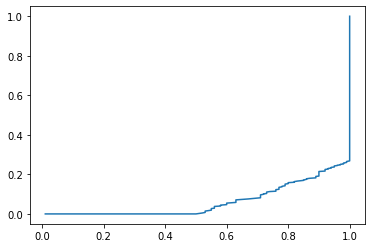

In [20]:

def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0


data = pd.read_csv("C:\\Users\\nsuguru\\Desktop\\PerformananceMetrics-master\\5_b.csv") 
data.shape
data['Y_Pred'] = data.apply(lambda row:label(row.proba),axis=1)
TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)

#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)

Y_Unique=data['proba'].unique()
p=np.round(Y_Unique,3)
Y_Unique=np.unique(p)
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))


from tqdm import tqdm
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
for j in tqdm(range(len(Y_Sorted))):
  j=j
  TP=0
  FP=0
  data['Y_Pred'] = data.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
  print(Y_Sorted[j])
  for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0 and data.iloc[i][2]==1:
        FP=FP+1
    elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
        TP=TP+1 
  #print(TP,FP)    
  TPR.append(TP/P)
  FPR.append(FP/N)
print(TPR)
print(FPR)


pAUC = np.trapz(TPR,FPR)
print(pAUC)
plt.plot(TPR,FPR)
Accuracy=((TP+TN)/(TP+TN+FP+FN))
print('Accuracy:',Accuracy)

In [5]:

def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0

data = pd.read_csv("C:\\Users\\nsuguru\\Desktop\\PerformananceMetrics-master\\5_c.csv") 
data.shape
data['Y_Pred'] = data.apply(lambda row:label(row.prob),axis=1)
TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)

#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)

Y_Unique=data['prob'].unique()
p=np.round(Y_Unique,2)
Y_Unique=np.unique(p)
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))


from tqdm import tqdm
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
A_min=0
thres_max=0
for j in tqdm(range(len(Y_Sorted))):
    #j=j*100
    TP=0
    FP=0
    TN=0
    FN=0
    if j==0:
        data['Y_Pred'] = data.apply(lambda row:label(row.prob,Y_Sorted[j]),axis=1)
    #print(Y_Sorted[j])
        for i in range(len(data.Y_Pred)):
            if data.iloc[i][0]==0 and data.iloc[i][2]==1:
                FP=FP+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
                TP=TP+1 
            elif data.iloc[i][0]==0 and data.iloc[i][2]==0:
                TN=TN+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==0:
                FN=FN+1
        A_min=((500*FP)+(100*FN))
        thres_max=Y_Sorted[0]
    else:
        data['Y_Pred'] = data.apply(lambda row:label(row.prob,Y_Sorted[j]),axis=1)
        #print(Y_Sorted[j])
        for i in range(len(data.Y_Pred)):
            if data.iloc[i][0]==0 and data.iloc[i][2]==1:
                FP=FP+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
                    TP=TP+1 
            elif data.iloc[i][0]==0 and data.iloc[i][2]==0:
                TN=TN+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==0:
                FN=FN+1
        thres=Y_Sorted[j]
        A=((500*FP)+(100*FN))
        #print(FP,FN)
        #print(A)
        if A<A_min:
            A_min=A
            thres_max=thres
            #print('A_min:',A)
            #print(thres_max)




1637 462 168 585
1047
1805
0.5587392550143266
0.7768924302788844
0.65
93



 72%|███████████████████████████████████████████████████████████                       | 67/93 [02:42<00:52,  2.00s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [03:21<00:00,  1.27s/it]

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{numebr of false positives} + 100 \times \text{numebr of false negatives}$

<pre>
   <b>Note 1:</b> in this data you can see number of positive points < number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
# write your code

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>